<a href="https://colab.research.google.com/github/SubramDas/Layout-Classification/blob/main/ProjectDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import zipfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Function to extract color features from an image
# def extract_color_features(image):
#     # Convert the image from BGR to RGB (OpenCV uses BGR by default)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     # Flatten the image into a 1D array of RGB values
#     pixels = image.reshape(-1, 3)
#     return pixels

In [ ]:
zip_path = '/content/drive/MyDrive/E7-images.zip'

In [ ]:
# Extract the zip folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/images')

In [ ]:
# List of image paths
image_paths = []
r = 1183
for i in range(1, r+1):
    if(i<10):
      image_paths.append(f'/content/images/000{i}.jpg')
    elif(i<100):
      image_paths.append(f'/content/images/00{i}.jpg')
    elif(i<1000):
      image_paths.append(f'/content/images/0{i}.jpg')
    else:
      image_paths.append(f'/content/images/{i}.jpg')

REMOVING ALL DUPLICATES

In [ ]:
import hashlib
from PIL import Image
import numpy as np

# Function to calculate the hash of an image
def calculate_image_hash(image_path):
    with Image.open(image_path) as img:
        img = img.resize((64, 48), Image.ANTIALIAS).convert('L')
        hash_value = hashlib.md5(np.array(img).tobytes()).hexdigest()
    return hash_value

# Dictionary to store unique images
unique_images = {}
unique_image_paths = []

# Iterating through each image path
for path in image_paths:
    img_hash = calculate_image_hash(path)
    if img_hash not in unique_images:
        unique_images[img_hash] = path
        unique_image_paths.append(path)

# unique_image_paths now contains only the paths of unique images


<ipython-input-7-e8ad133c4d29>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((64, 48), Image.ANTIALIAS).convert('L')


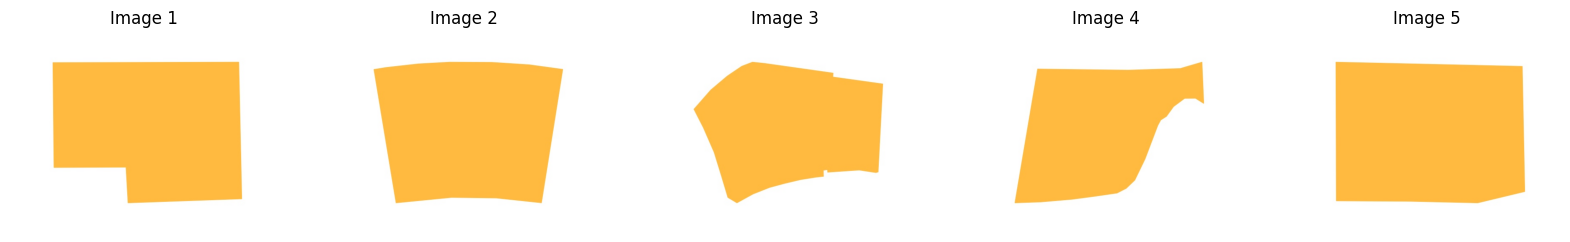

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display images
def display_images(image_paths, num_images=5):
    plt.figure(figsize=(20, 10))
    for i, path in enumerate(image_paths[:num_images]):
        img = mpimg.imread(path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()

# Display the first 5 images
display_images(unique_image_paths)


CALCULATING LENGTH, WIDTH AND AREA OF THE TIGHT FITTING BOX

146087.11270737648


<ipython-input-9-b4b4415ab8a3>:37: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box_points = cv2.boxPoints(oriented_box).astype(np.int0)


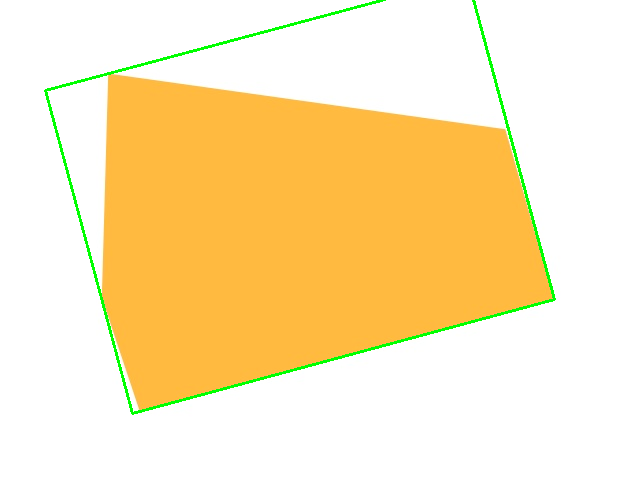

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Function to find tight-fitting bounding box and calculate its length and width
def calculate_tight_fitting_box(image):
    # Convert the image to grayscale
    image = cv2.imread(image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour = max(contours, key=cv2.contourArea)

    # Find the oriented bounding box for the contour
    oriented_box = cv2.minAreaRect(contour)

    # Extract the length and width of the oriented bounding box
    length = max(oriented_box[1])
    width = min(oriented_box[1])

    return length, width, oriented_box, width * length

# Read an image
image = cv2.imread('/content/images/0171.jpg')

# Calculate the tight-fitting bounding box and its length, width, and coordinates
TFB_length, TFB_width, oriented_box, TFB_area = calculate_tight_fitting_box('/content/images/0171.jpg')

print(TFB_area)

# Draw the tight-fitting bounding box on the image
image_with_box = image.copy()
box_points = cv2.boxPoints(oriented_box).astype(np.int0)
cv2.drawContours(image_with_box, [box_points], 0, (0, 255, 0), 2)

# Display the image with the tight-fitting bounding box
cv2_imshow(image_with_box)


In [ ]:
TFB_length_features = []
TFB_width_features = []
TFB_area_features = []

for path in unique_image_paths:
    TFB_length, TFB_width, a, TFB_area = calculate_tight_fitting_box(path)
    TFB_length_features.append(TFB_length)
    TFB_width_features.append(TFB_width)
    TFB_area_features.append(TFB_area)

Cover the image with a tight fitting polygon

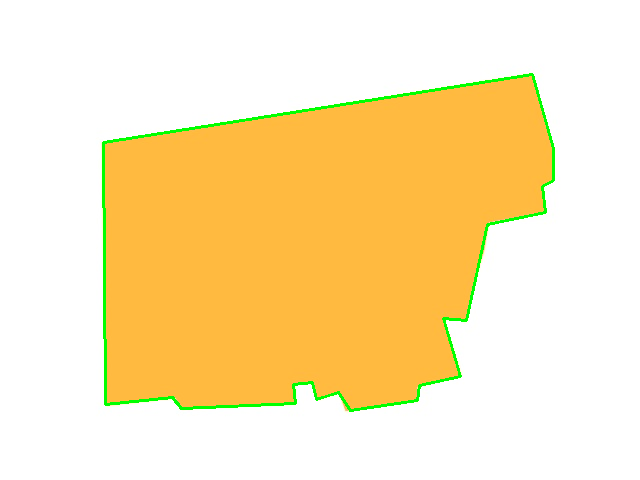

Number of Edges: 21
Angles of the Edges: [170.99308507111607, 89.56263613247927, -5.96448710125312, 50.71059313749964, -2.511363267163078, -96.00900595749452, -6.009005957494525, 76.7594800848128, -17.650124219930124, 56.309932474020215, -8.488943880504717, -82.40535663140857, -12.380756928807177, -106.33604288971847, 4.969740728110304, -77.66091272167381, -11.689369175439193, -96.58194465517802, -28.61045966596522, -90.0, -105.84308211768702]
Edge Lengths: [434.35584490138956, 262.00763347658403, 67.36467917239716, 14.212670403551895, 114.10959644131601, 19.1049731745428, 19.1049731745428, 17.46424919657298, 23.08679276123039, 21.633307652783937, 67.7421582177598, 15.132745950421556, 41.97618372363071, 60.440052945046304, 23.08679276123039, 98.2700361249552, 59.22837157984339, 26.1725046566048, 12.529964086141668, 32.0, 76.92203845452875]
Mean Edge Length: 71.71169375500354 pixels
Standard Deviation of Edge Lengths: 97.79231943610576 pixels
Area of the Polygon: 114861.5 pixels^2
Perim

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import math

# Function to preprocess the image for better edge detection
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Use adaptive thresholding to handle varying lighting conditions
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Function to find and draw a tight-fitting polygon around the object using contour approximation
def draw_tight_fitting_polygon(image):
    image = cv2.imread(image)
    # Preprocess the image
    preprocessed = preprocess_image(image)
    # Apply Canny edge detection
    edges = cv2.Canny(preprocessed, 50, 150)  # Adjusted thresholds
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the contour with the maximum area
    contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to a polygon with fewer vertices
    epsilon = 0.003 * cv2.arcLength(contour, True)  # Finer approximation
    approx_polygon = cv2.approxPolyDP(contour, epsilon, True)

    # Draw the approximated polygon on the image
    image_with_polygon = image.copy()
    cv2.drawContours(image_with_polygon, [approx_polygon], 0, (0, 255, 0), 2)

    return approx_polygon, image_with_polygon

# Function to calculate angles, edge statistics, and display results
def calculate_polygon_properties(polygon):
    num_edges = len(polygon)

    # Initialize lists to store edge lengths and angles
    edge_lengths = []
    angles = []

    for i in range(num_edges):
        p1 = polygon[i][0]
        p2 = polygon[(i + 1) % num_edges][0]

        # Calculate edge length
        length = np.linalg.norm(p2 - p1)
        edge_lengths.append(length)

        # Calculate angle (relative to horizontal)
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        angle = math.degrees(math.atan2(dy, dx))
        angles.append(angle)

    # Calculate mean and standard deviation of edge lengths
    edge_mean = np.mean(edge_lengths)
    edge_std_dev = np.std(edge_lengths)

    # Calculate area and perimeter of the polygon
    area = cv2.contourArea(polygon)
    perimeter = cv2.arcLength(polygon, True)

    return angles, edge_lengths, num_edges, edge_mean, edge_std_dev, area, perimeter

# Read the image
# image = cv2.imread()

# Draw the tight-fitting polygon around the object using contour approximation
approx_polygon, image_with_polygon = draw_tight_fitting_polygon('/content/images/0147.jpg')

# Calculate the angles, number of edges, edge mean, and edge standard deviation
angles, edge_lengths, num_edges, edge_mean, edge_std_dev, area, perimeter = calculate_polygon_properties(approx_polygon)

# Display the image with the tight-fitting polygon
cv2_imshow(image_with_polygon)

# Print the results
print(f"Number of Edges: {num_edges}")
print(f"Angles of the Edges: {angles}")
print(f"Edge Lengths: {edge_lengths}")
print(f"Mean Edge Length: {edge_mean} pixels")
print(f"Standard Deviation of Edge Lengths: {edge_std_dev} pixels")
print(f"Area of the Polygon: {area} pixels^2")
print(f"Perimeter of the Polygon: {perimeter} pixels")


GETTING ALL TFP features in an array

In [ ]:
TFP_num_edges_features = []
TFP_angles_features = []
TFP_edge_length_features = []
TFP_edge_mean_features = []
TFP_edge_std_dev_features = []
TFP_area_features = []
TFP_perimeter_features = []

for path in unique_image_paths:
  # Draw the tight-fitting polygon around the object using contour approximation
  approx_polygon, image_with_polygon = draw_tight_fitting_polygon(path)
  # Calculate the angles, number of edges, edge mean, and edge standard deviation
  angles, edge_lengths, num_edges, edge_mean, edge_std_dev, area, perimeter = calculate_polygon_properties(approx_polygon)
  TFP_angles_features.append(angles)
  TFP_edge_length_features.append(edge_lengths)
  TFP_num_edges_features.append(num_edges)
  TFP_edge_mean_features.append(edge_mean)
  TFP_edge_std_dev_features.append(edge_std_dev)
  TFP_area_features.append(area)
  TFP_perimeter_features.append(perimeter)

In [ ]:
import numpy as np

# Function to categorize angles into specified bins
def categorize_angles(angle_list):
    # Define the bins as (start, end) tuples
    bins = [
        (0, 45),
        (45, 90),
        (90, 135),
        (135, 180),
        (0, -45),
        (-45, -90),
        (-90, -135),
        (-135, -180)
    ]

    # Initialize a dictionary to store the count of angles in each bin
    angle_counts = {
        'angle_1': 0,
        'angle_2': 0,
        'angle_3': 0,
        'angle_4': 0,
        'angle_5': 0,
        'angle_6': 0,
        'angle_7': 0,
        'angle_8': 0
    }

    # Categorize each angle into one of the bins
    for angle in angle_list:
        if 0 <= angle < 45:
            angle_counts['angle_1'] += 1
        elif 45 <= angle < 90:
            angle_counts['angle_2'] += 1
        elif 90 <= angle < 135:
            angle_counts['angle_3'] += 1
        elif 135 <= angle < 180:
            angle_counts['angle_4'] += 1
        elif -45 <= angle < 0:
            angle_counts['angle_5'] += 1
        elif -90 <= angle < -45:
            angle_counts['angle_6'] += 1
        elif -135 <= angle < -90:
            angle_counts['angle_7'] += 1
        elif -180 <= angle < -135:
            angle_counts['angle_8'] += 1

    return angle_counts

TFP_angle_cnt_features = []
for angles in TFP_angles_features:
  TFP_angle_cnt_features.append(categorize_angles(angles))

GETTING HULL AREA AND DEFECTS

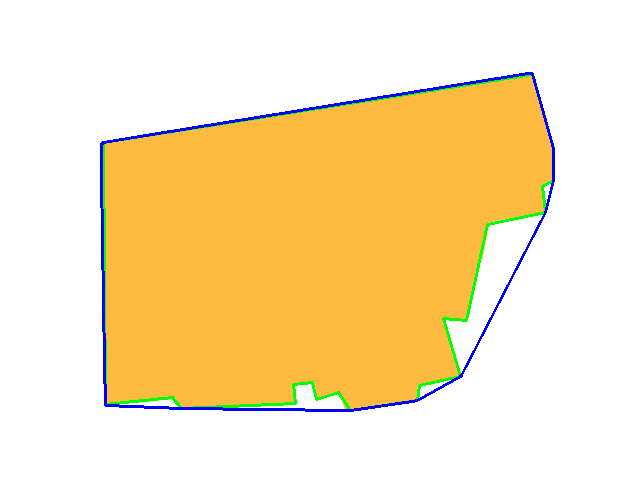

Number of Edges: 21
Angles of the Edges: [170.99308507111607, 89.56263613247927, -5.96448710125312, 50.71059313749964, -2.511363267163078, -96.00900595749452, -6.009005957494525, 76.7594800848128, -17.650124219930124, 56.309932474020215, -8.488943880504717, -82.40535663140857, -12.380756928807177, -106.33604288971847, 4.969740728110304, -77.66091272167381, -11.689369175439193, -96.58194465517802, -28.61045966596522, -90.0, -105.84308211768702]
Edge Lengths: [434.35584490138956, 262.00763347658403, 67.36467917239716, 14.212670403551895, 114.10959644131601, 19.1049731745428, 19.1049731745428, 17.46424919657298, 23.08679276123039, 21.633307652783937, 67.7421582177598, 15.132745950421556, 41.97618372363071, 60.440052945046304, 23.08679276123039, 98.2700361249552, 59.22837157984339, 26.1725046566048, 12.529964086141668, 32.0, 76.92203845452875]
Mean Edge Length: 71.71169375500354 pixels
Standard Deviation of Edge Lengths: 97.79231943610576 pixels
Area of the Polygon: 114861.5 pixels^2
Perim

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import math

# Function to preprocess the image for better edge detection
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Use adaptive thresholding to handle varying lighting conditions
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Function to find and draw a tight-fitting polygon and convex hull on the image
def draw_polygons(image):
    # Preprocess the image
    image = cv2.imread(image)
    preprocessed = preprocess_image(image)
    # Apply Canny edge detection
    edges = cv2.Canny(preprocessed, 50, 150)  # Adjusted thresholds
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the contour with the maximum area
    contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to a polygon with fewer vertices
    epsilon = 0.003 * cv2.arcLength(contour, True)  # Finer approximation
    approx_polygon = cv2.approxPolyDP(contour, epsilon, True)

    # Compute the convex hull of the contour
    hull = cv2.convexHull(contour)

    # Draw the approximated polygon and convex hull on the image
    image_with_polygons = image.copy()
    cv2.drawContours(image_with_polygons, [approx_polygon], 0, (0, 255, 0), 2)  # Green for polygon
    cv2.drawContours(image_with_polygons, [hull], -1, (255, 0, 0), 2)  # Blue for convex hull

    return approx_polygon, hull, image_with_polygons, contour

# Function to calculate angles, edge statistics, convex hull, and defects
def calculate_polygon_properties(polygon, contour):
    num_edges = len(polygon)

    # Initialize lists to store edge lengths and angles
    edge_lengths = []
    angles = []

    for i in range(num_edges):
        p1 = polygon[i][0]
        p2 = polygon[(i + 1) % num_edges][0]

        # Calculate edge length
        length = np.linalg.norm(p2 - p1)
        edge_lengths.append(length)

        # Calculate angle (relative to horizontal)
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        angle = math.degrees(math.atan2(dy, dx))
        angles.append(angle)

    # Calculate mean and standard deviation of edge lengths
    edge_mean = np.mean(edge_lengths)
    edge_std_dev = np.std(edge_lengths)

    # Calculate area and perimeter of the polygon
    area = cv2.contourArea(polygon)
    perimeter = cv2.arcLength(polygon, True)

    # Compute the convex hull of the contour
    hull_area = cv2.contourArea(cv2.convexHull(contour))

    # Compute convexity defects
    hull_indices = cv2.convexHull(contour, returnPoints=False)
    defects = cv2.convexityDefects(contour, hull_indices)

    # Calculate defect information
    defect_info = []
    if defects is not None:
        for i in range(defects.shape[0]):
            start, end, far, _ = defects[i, 0]
            start_point = tuple(contour[start][0])
            end_point = tuple(contour[end][0])
            far_point = tuple(contour[far][0])
            defect_length = np.linalg.norm(np.array(start_point) - np.array(far_point))
            defect_info.append(defect_length)

    return angles, edge_lengths, num_edges, edge_mean, edge_std_dev, area, perimeter, hull_area, defect_info

# Read the image
image = cv2.imread('/content/images/0147.jpg')

# Draw the tight-fitting polygon and convex hull around the object
approx_polygon, hull, image_with_polygons, contour = draw_polygons('/content/images/0147.jpg')

# Calculate the angles, number of edges, edge mean, edge standard deviation, convex hull area, and defects
angles, edge_lengths, num_edges, edge_mean, edge_std_dev, area, perimeter, hull_area, defect_info = calculate_polygon_properties(approx_polygon, contour)

# Display the image with both the polygon and the convex hull
cv2_imshow(image_with_polygons)

# Print the results
print(f"Number of Edges: {num_edges}")
print(f"Angles of the Edges: {angles}")
print(f"Edge Lengths: {edge_lengths}")
print(f"Mean Edge Length: {edge_mean} pixels")
print(f"Standard Deviation of Edge Lengths: {edge_std_dev} pixels")
print(f"Area of the Polygon: {area} pixels^2")
print(f"Perimeter of the Polygon: {perimeter} pixels")
print(f"Convex Hull Area: {hull_area} pixels^2")
print(f"Defect Lengths: {defect_info}")


In [ ]:
TFP_hull_area_features =[]
TFP_defects_features = []

for image in unique_image_paths:
  # Draw the tight-fitting polygon and convex hull around the object
  approx_polygon, hull, image_with_polygons, contour = draw_polygons(image)
  # Calculate the angles, number of edges, edge mean, edge standard deviation, convex hull area, and defects
  angles, edge_lengths, num_edges, edge_mean, edge_std_dev, area, perimeter, hull_area, defect_info = calculate_polygon_properties(approx_polygon, contour)

  TFP_hull_area_features.append(hull_area)
  TFP_defects_features.append(defect_info)

len(TFP_defects_features)

173

In [ ]:
TFP_defect_num_features = [];

for defects in TFP_defects_features:

  mean_defect_length = np.mean(defects)
  std_defect_length = np.std(defects)
  major_defect_threshold = mean_defect_length + 2 * std_defect_length

  major_defects = [length for length in defects if length >= major_defect_threshold]
  TFP_defect_num_features.append(len(major_defects))

print(TFP_defect_num_features)

[0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1]


Histogram of Angles for 173 images

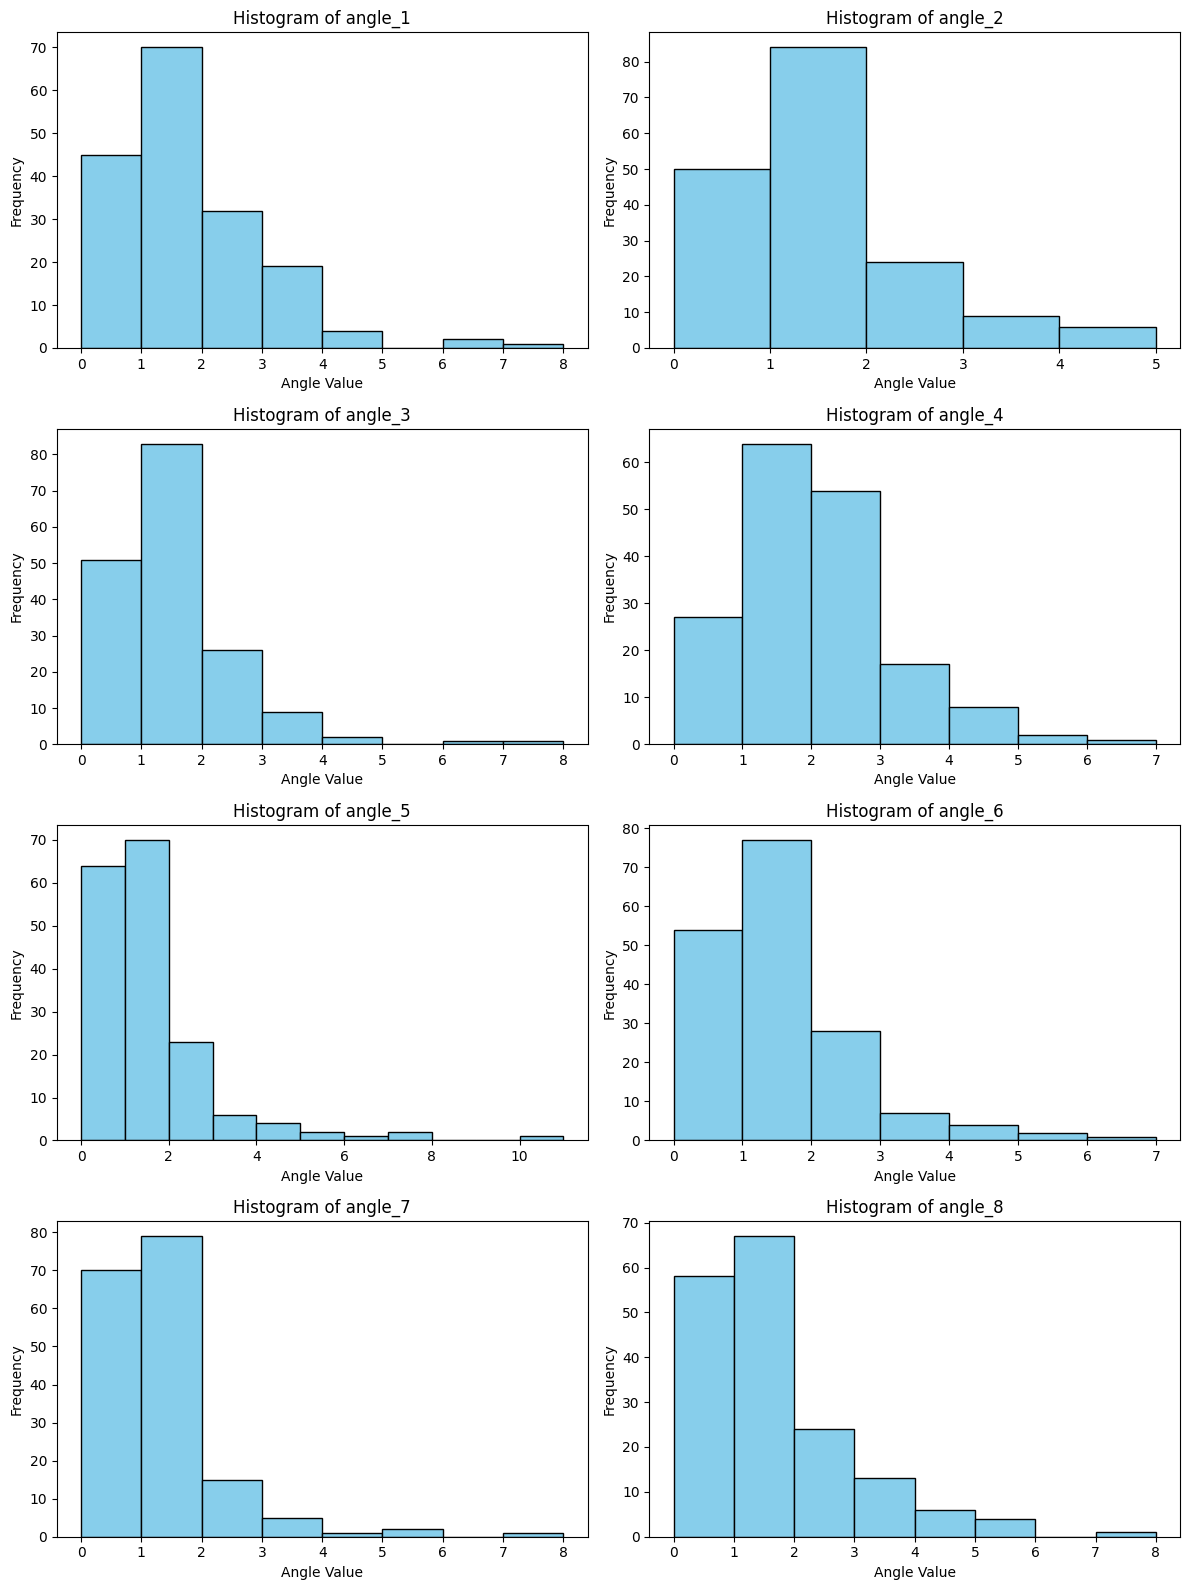

In [ ]:
import matplotlib.pyplot as plt

# this histogram shows us that how many images had angles_1 = 2 or like the how many edges had 0, 45 deg

# Extract angles for each key
angle_keys = ['angle_1', 'angle_2', 'angle_3', 'angle_4', 'angle_5', 'angle_6', 'angle_7', 'angle_8']
angle_data = {key: [] for key in angle_keys}

for angles in TFP_angle_cnt_features:
    for key in angle_keys:
        angle_data[key].append(angles[key])

# Plotting histograms
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for i, key in enumerate(angle_keys):
    axes[i].hist(angle_data[key], bins=range(min(angle_data[key]), max(angle_data[key])+2), color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {key}')
    axes[i].set_xlabel('Angle Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


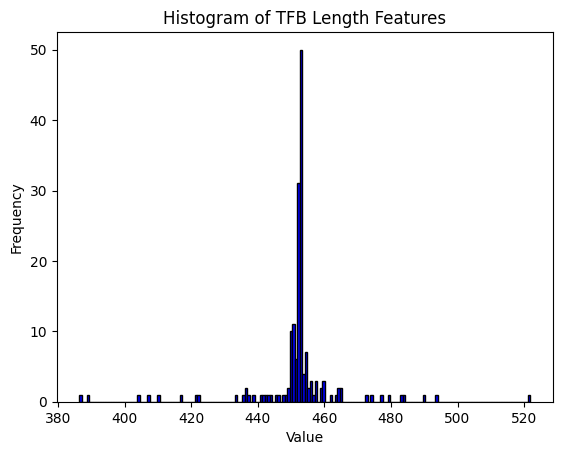

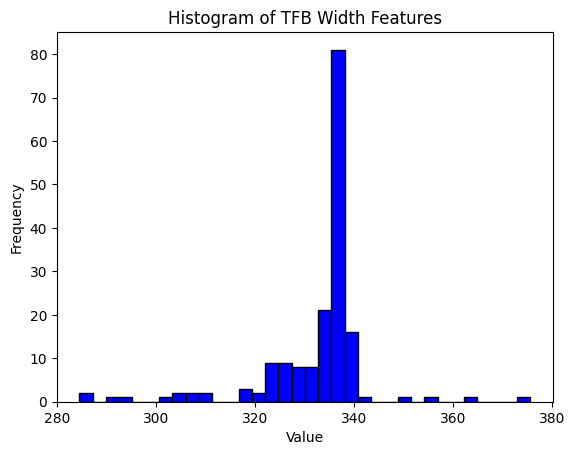

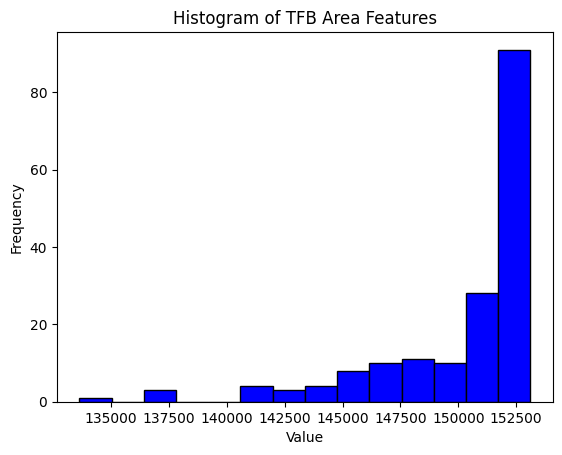

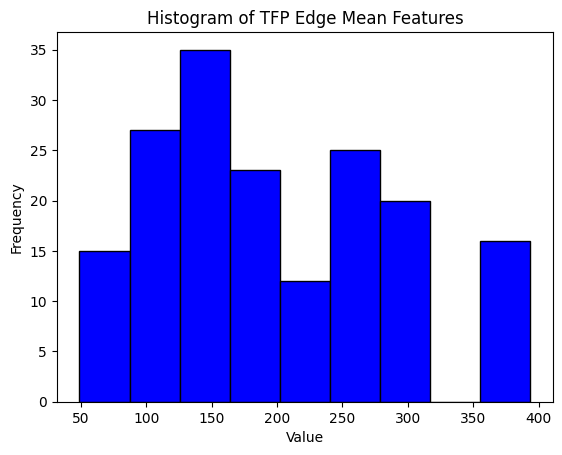

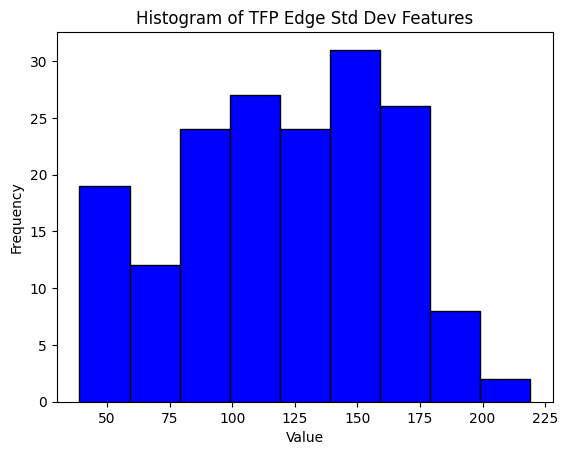

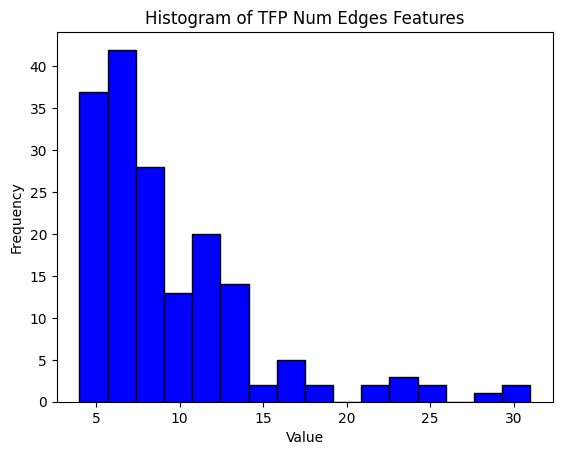

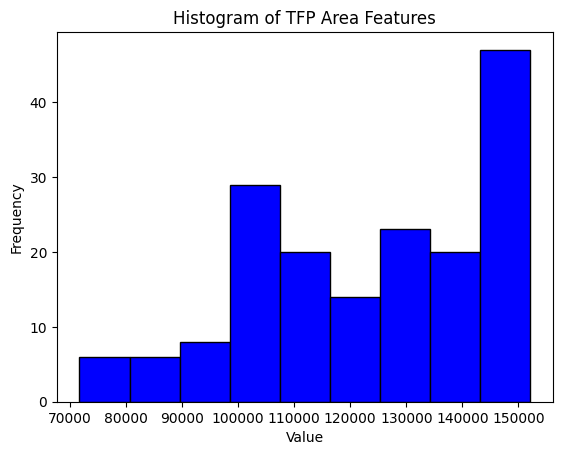

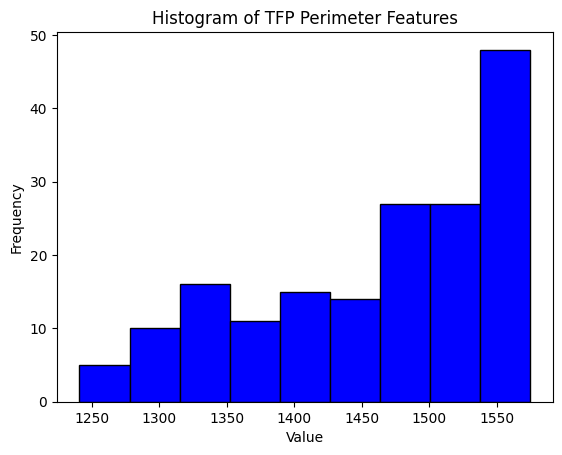

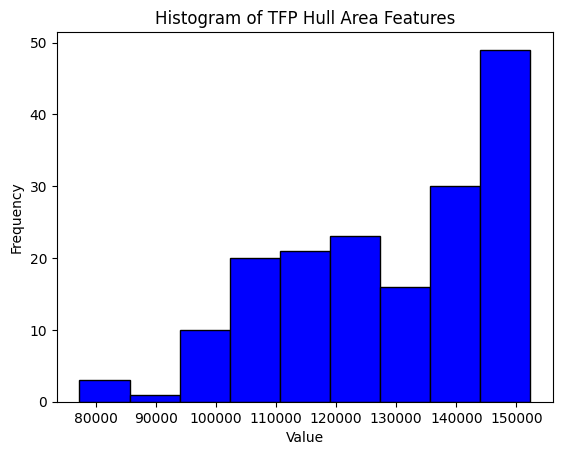

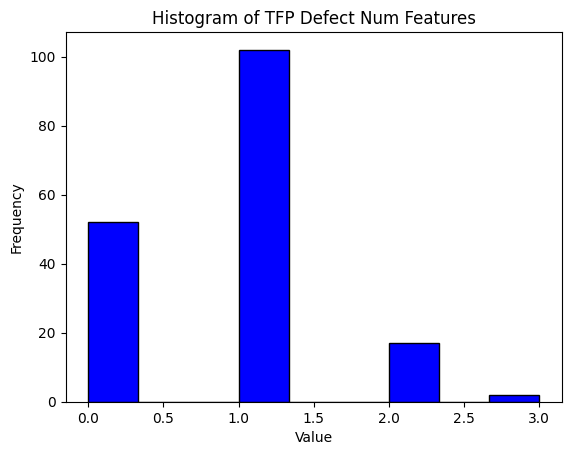

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of histogram arrays and their corresponding names
histogram_data = [
    ("TFB Length Features", TFB_length_features),
    ("TFB Width Features", TFB_width_features),
    ("TFB Area Features", TFB_area_features),
    ("TFP Edge Mean Features", TFP_edge_mean_features),
    ("TFP Edge Std Dev Features", TFP_edge_std_dev_features),
    ("TFP Num Edges Features", TFP_num_edges_features),
    ("TFP Area Features", TFP_area_features),
    ("TFP Perimeter Features", TFP_perimeter_features),
    ("TFP Hull Area Features", TFP_hull_area_features),
    ("TFP Defect Num Features", TFP_defect_num_features)
]

# Loop through the histogram data
for name, his in histogram_data:
    # Create the histogram
    plt.hist(his, bins='auto', color='blue', edgecolor='black')

    # Add title and labels
    plt.title(f'Histogram of {name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


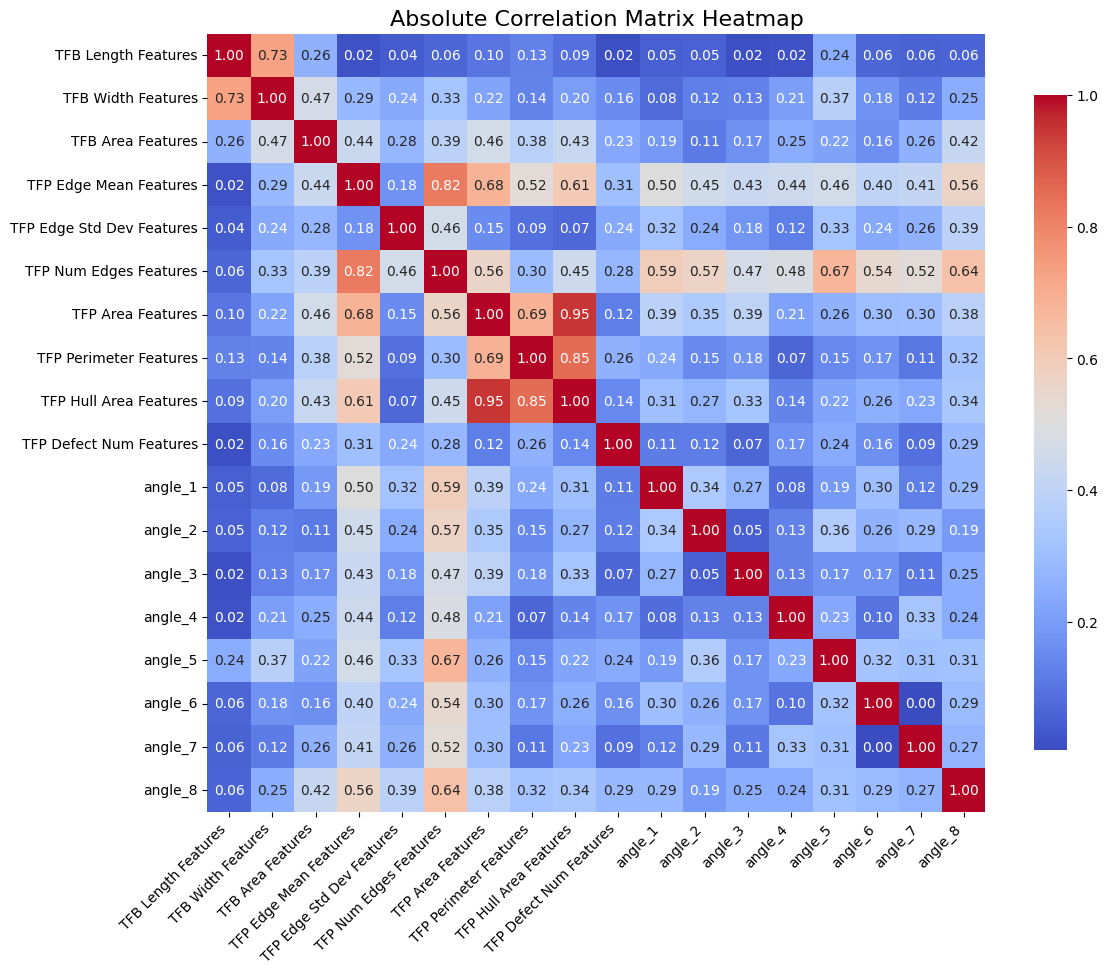

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Creating a DataFrame
data = {
    "TFB Length Features": TFB_length_features,
    "TFB Width Features": TFB_width_features,
    "TFB Area Features": TFB_area_features,
    "TFP Edge Mean Features": TFP_edge_mean_features,
    "TFP Edge Std Dev Features": TFP_edge_std_dev_features,
    "TFP Num Edges Features": TFP_num_edges_features,
    "TFP Area Features": TFP_area_features,
    "TFP Perimeter Features": TFP_perimeter_features,
    "TFP Hull Area Features": TFP_hull_area_features,
    "TFP Defect Num Features": TFP_defect_num_features,
}

# Add angle features to the DataFrame
for angle_key, angle_values in angle_data.items():
    data[angle_key] = angle_values
    # print(data[angle_key])

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Convert negative correlations to positive
absolute_correlation_matrix = correlation_matrix.abs()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(absolute_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Absolute Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Hull area and TFP area are highly correlated and should be dropped

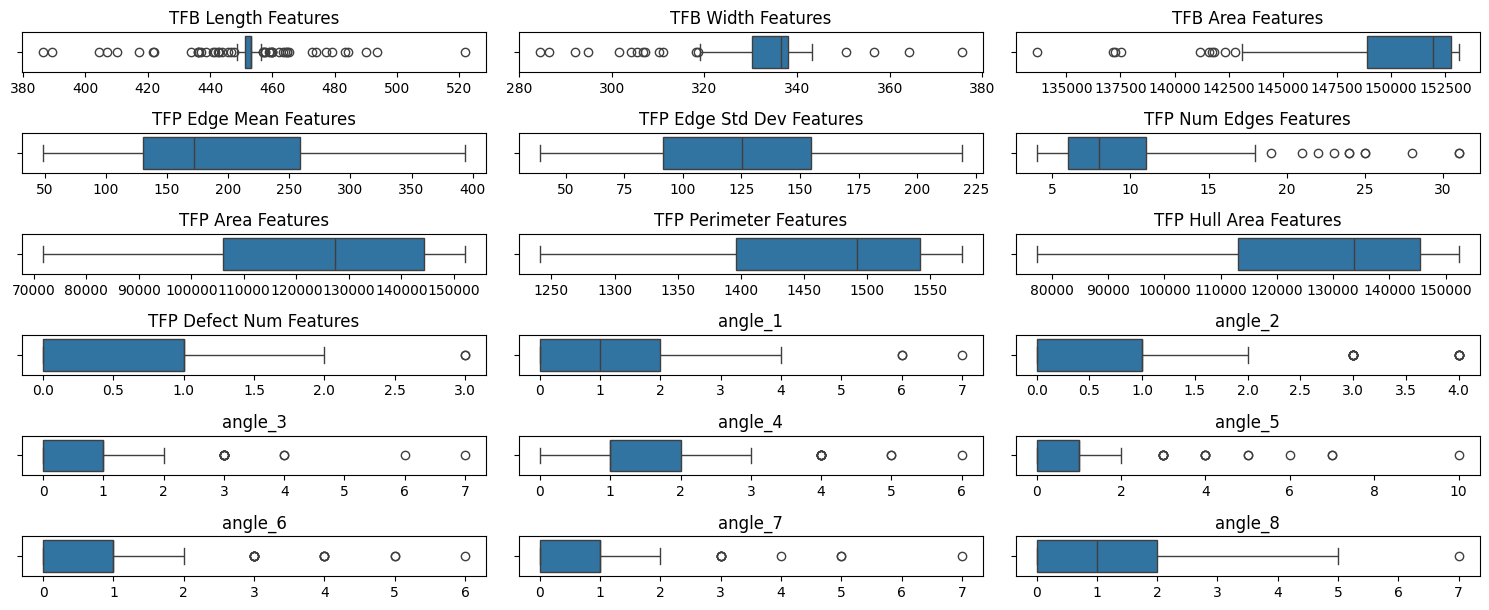

In [ ]:
data = {
    "TFB Length Features": TFB_length_features,
    "TFB Width Features": TFB_width_features,
    "TFB Area Features": TFB_area_features,
    "TFP Edge Mean Features": TFP_edge_mean_features,
    "TFP Edge Std Dev Features": TFP_edge_std_dev_features,
    "TFP Num Edges Features": TFP_num_edges_features,
    "TFP Area Features": TFP_area_features,
    "TFP Perimeter Features": TFP_perimeter_features,
    "TFP Hull Area Features": TFP_hull_area_features,
    "TFP Defect Num Features": TFP_defect_num_features,
}

# Add angle features to the DataFrame
for angle_key, angle_values in angle_data.items():
    data[angle_key] = angle_values

# Create DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure for boxplots
plt.figure(figsize=(15, 10))

# Generate boxplots for all features
for i, column in enumerate(df.columns):
    plt.subplot(10, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

Extracting features using VGG16 model (METHOD 1 for Clustering images)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
# Function to extract features using a pre-trained CNN model (VGG16)
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.vgg16.preprocess_input(x)
    features = model.predict(x)
    return features

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
# Extract features for all images
VGG_features = [extract_features(img_path) for img_path in unique_image_paths]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# import numpy as np
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input

# # Function to load and preprocess an image
# def load_and_preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#     img_array = preprocess_input(img_array)  # Preprocess image for VGG16
#     return img_array

# # Load the VGG16 model with pre-trained ImageNet weights, including up to a certain layer
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Choose a layer that outputs fewer features (e.g., 'block5_conv3')
# layer_name = 'block5_conv3'
# model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# # Flatten the features if needed
# features = model.output
# features = GlobalAveragePooling2D()(features)

# # Create a new model to output these features
# model = Model(inputs=base_model.input, outputs=features)

# # # Extract the features for your images
# # VGG_features_reduced = [model.predict(img_path) for img_path in unique_image_paths]



# # Extract the features for your images
# VGG_features_reduced = []
# for img_path in unique_image_paths:
#     img_array = load_and_preprocess_image(img_path)
#     features = model.predict(img_array)
#     VGG_features_reduced.append(features)

# # Convert the list to a NumPy array for easier handling
# VGG_features_reduced = np.array(VGG_features_reduced)



In [ ]:
# len(VGG_features[0][0])
# print(np.shape(VGG_features))
# X_vgg = (VGG_features_reduced)
# X_vgg = np.squeeze(X_vgg, axis=1)

# print(np.shape(X_vgg))



In [ ]:
VGG_features = np.array(VGG_features)
VGG_features = np.squeeze(VGG_features, axis=1)

print(np.shape(VGG_features))


(173, 4096)


In [ ]:
import numpy as np
import pandas as pd

# Create a DataFrame to hold the data
data = {
    "TFB Length Features": TFB_length_features,
    "TFB Width Features": TFB_width_features,
    "TFB Area Features": TFB_area_features,
    "TFP Edge Mean Features": TFP_edge_mean_features,
    "TFP Edge Std Dev Features": TFP_edge_std_dev_features,
    "TFP Num Edges Features": TFP_num_edges_features,
    "TFP Area Features": TFP_area_features,
    "TFP Perimeter Features": TFP_perimeter_features,
    "TFP Defect Num Features": TFP_defect_num_features,
}

# Add angle features to the DataFrame
for angle_key, angle_values in angle_data.items():
    data[angle_key] = angle_values

# Create a DataFrame
df = pd.DataFrame(data)

# Now extract one value from each feature for each image
# In this case, we are taking the first value (index 0) from each feature
selected_values = df.iloc[0].values  # Select the first image as an example

# If you want to select values from all images, you can create a new array
merged_values = []

# Iterate over each row (image) in the DataFrame
for index in range(df.shape[0]):
    merged_values.append(df.iloc[index].values)

# Convert to a NumPy array for easier manipulation if needed
merged_values_array = np.array(merged_values)

extracted_features = merged_values_array
# Print the shape of the merged values array
print('extracted_features Shape:', merged_values_array.shape)



extracted_features Shape: (173, 17)


In [ ]:
# merged_features = np.concatenate((X_vgg, merged_values_array), axis=1)
# print('Merged Features shape:', merged_features.shape)

Elbow Method for knowing clusters for KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

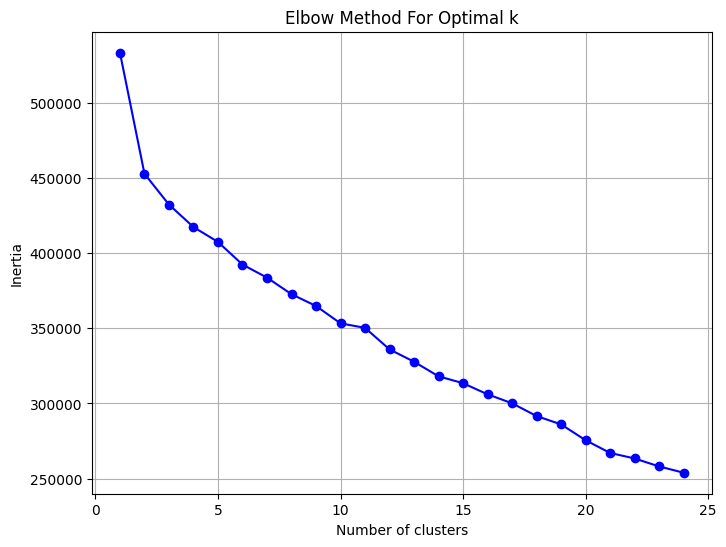

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming merged_features is your array of concatenated features
# merged_features = np.array(merged_features)  # Replace with your actual data

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(VGG_features)

# Apply the Elbow Method
inertia = []
K = range(1, 25)  # You can adjust the range for more clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


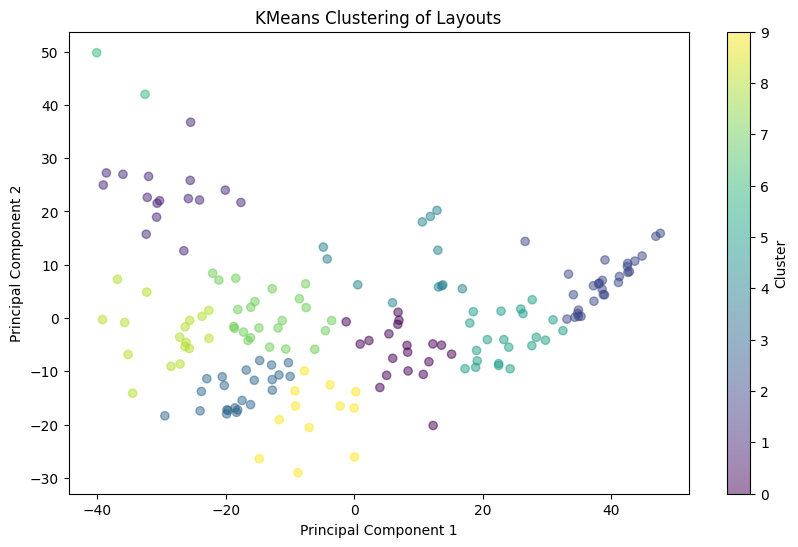

Cluster 0: Complexity -0.011280891485512257
Cluster 1: Complexity 0.09256984293460846
Cluster 2: Complexity -0.05334126949310303
Cluster 3: Complexity -0.004102651961147785
Cluster 4: Complexity 0.0344647653400898
Cluster 5: Complexity -0.05131547898054123
Cluster 6: Complexity 0.19142842292785645
Cluster 7: Complexity 0.027549218386411667
Cluster 8: Complexity 0.0014197995187714696
Cluster 9: Complexity -0.004620131570845842


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)  # You can adjust the number of components
X_pca = pca.fit_transform(scaled_features)

# Perform PCA for dimensionality reduction

# Perform KMeans clustering with 3 clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Layouts')
plt.colorbar(label='Cluster')
plt.show()

# Determine the complexity of each cluster (you may need to adjust this based on your features)
cluster_complexity = [np.mean(scaled_features[cluster_labels == i]) for i in range(n_clusters)]

# Print the complexity of each cluster
for i, complexity in enumerate(cluster_complexity):
    print(f"Cluster {i}: Complexity {complexity}")




In [ ]:
# Scale the feature values
# X = X.reshape(-1, 2)
X = scaled_features

print(X.shape)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Define the number of clusters (low, medium, high complexity)
n_clusters = 10

# Build the KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Create a pipeline with scaling and clustering
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to the data
pipeline.fit(X)

# Get the cluster labels
cluster_labels = pipeline.predict(X)

import numpy as np
import matplotlib.pyplot as plt

# Count the number of images in each cluster
num_clusters = 10
cluster_counts = np.zeros(num_clusters)

# for cluster in clusters:

# Print the cluster labels for each contour
for i, label in enumerate(cluster_labels):
    print(f"Contour {i+1}: Complexity cluster {label}")
    cluster_counts[label] += 1

(173, 4096)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Contour 1: Complexity cluster 2
Contour 2: Complexity cluster 8
Contour 3: Complexity cluster 3
Contour 4: Complexity cluster 4
Contour 5: Complexity cluster 2
Contour 6: Complexity cluster 6
Contour 7: Complexity cluster 2
Contour 8: Complexity cluster 8
Contour 9: Complexity cluster 9
Contour 10: Complexity cluster 6
Contour 11: Complexity cluster 2
Contour 12: Complexity cluster 2
Contour 13: Complexity cluster 6
Contour 14: Complexity cluster 2
Contour 15: Complexity cluster 1
Contour 16: Complexity cluster 6
Contour 17: Complexity cluster 6
Contour 18: Complexity cluster 8
Contour 19: Complexity cluster 2
Contour 20: Complexity cluster 6
Contour 21: Complexity cluster 6
Contour 22: Complexity cluster 2
Contour 23: Complexity cluster 6
Contour 24: Complexity cluster 3
Contour 25: Complexity cluster 1
Contour 26: Complexity cluster 5
Contour 27: Complexity cluster 2
Contour 28: Complexity cluster 0
Contour 29: Complexity cluster 6
Contour 30: Complexity cluster 0
Contour 31: Complex

5 33


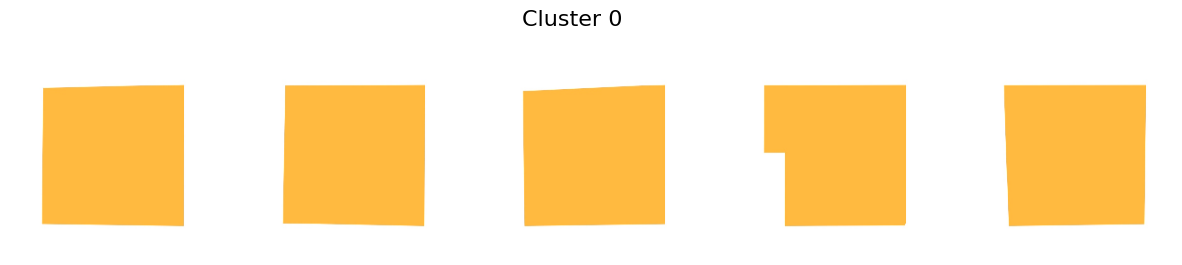

5 13


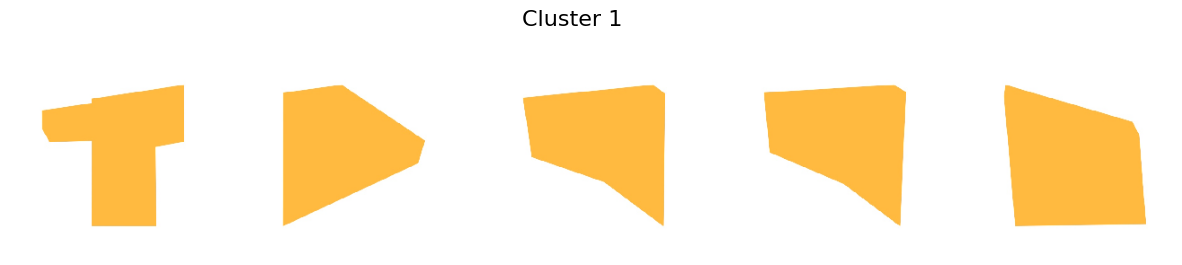

5 50


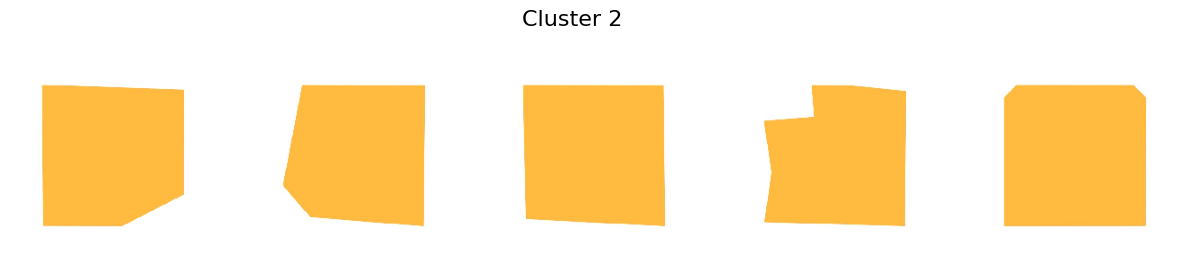

5 9


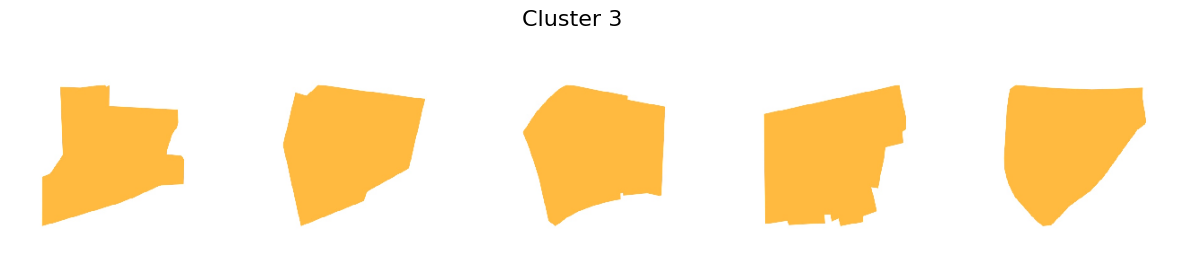

5 7


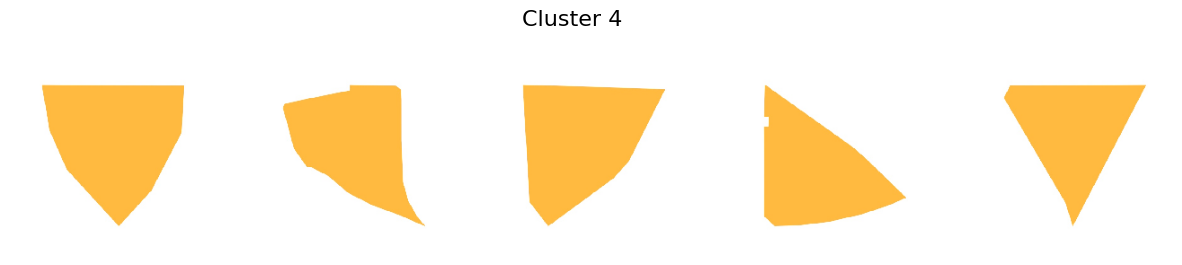

5 10


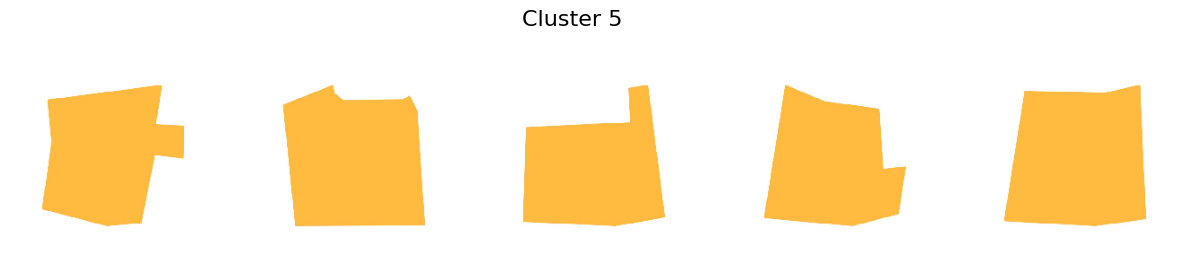

5 35


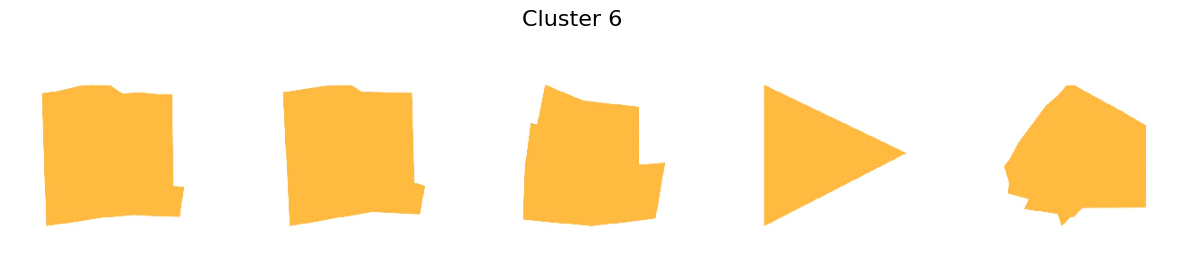

1 1


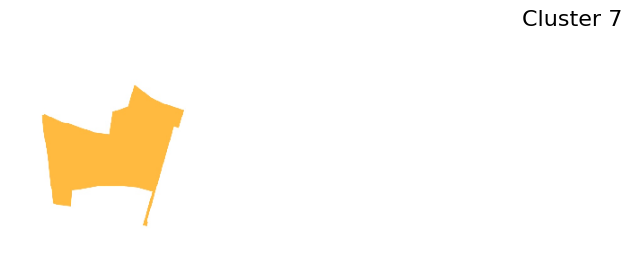

5 13


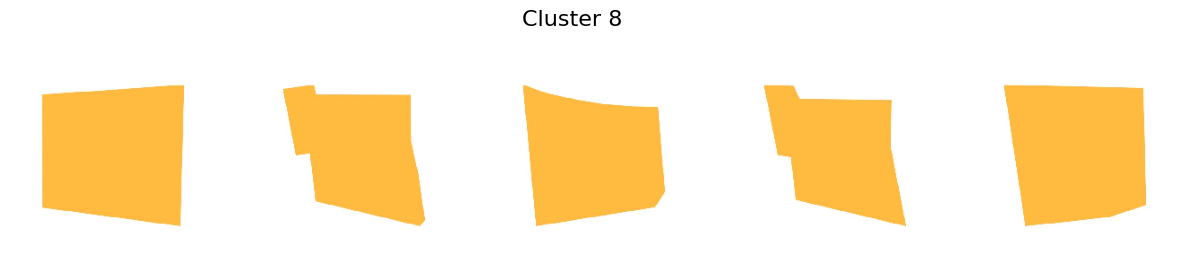

2 2


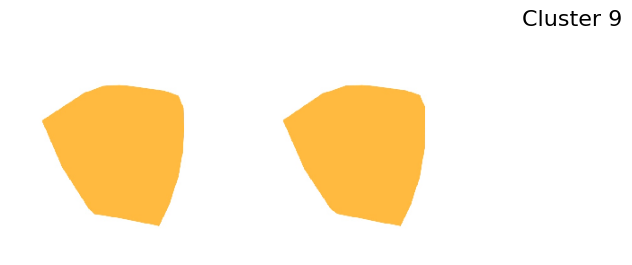

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'unique_image_paths' contains the paths to the images
# and 'cluster_labels' contains the corresponding cluster labels

# Number of images to display per cluster
n_images_per_cluster = 5
# n_images_per_cluster = min(n_images_per_cluster, len(cluster_indices))

# Plot images from each cluster
for cluster_num in range(10):
    # Get the indices of images belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_num)[0]

    n_images_cluster = min(n_images_per_cluster, len(cluster_indices))
    print(n_images_cluster, len(cluster_indices))

    # Randomly select a few images from the cluster to display
    selected_indices = np.random.choice(cluster_indices, n_images_cluster, replace=False)

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Cluster {cluster_num}", fontsize=16)

    for i, img_idx in enumerate(selected_indices):
        img_path = unique_image_paths[img_idx]

        # Load and display the image
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(1, n_images_per_cluster, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()


[33. 13. 50.  9.  7. 10. 35.  1. 13.  2.]


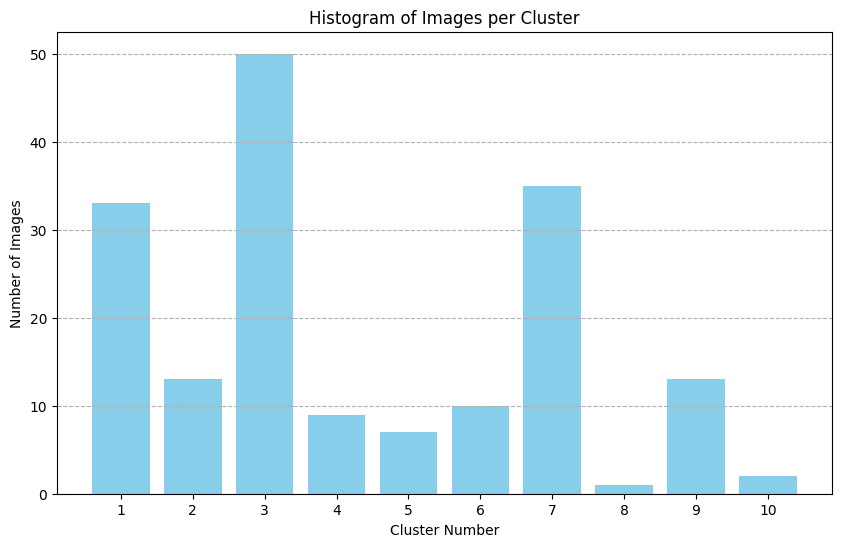

In [ ]:
  # Adjust for zero-based indexing

print(cluster_counts)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_clusters + 1), cluster_counts, color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Cluster')
plt.xticks(range(1, num_clusters + 1))  # Set x-ticks to cluster numbers
plt.grid(axis='y', linestyle='--')

# Show the histogram
plt.show()


Elbow method for our extracted features [METHOD 2]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

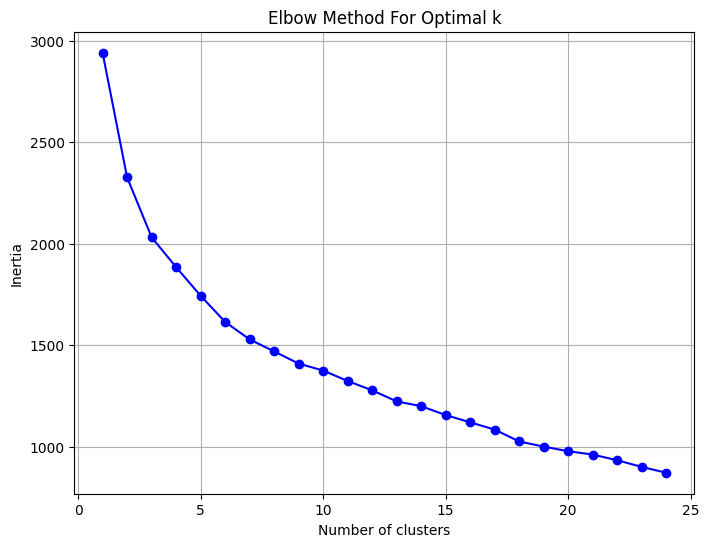

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming merged_features is your array of concatenated features
# merged_features = np.array(merged_features)  # Replace with your actual data

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(extracted_features)

# Apply the Elbow Method
inertia = []
K = range(1, 25)  # You can adjust the range for more clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# Scale the feature values
# X = X.reshape(-1, 2)
X = scaled_features

print(X.shape)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Define the number of clusters (low, medium, high complexity)
n_clusters = 5

# Build the KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Create a pipeline with scaling and clustering
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to the data
pipeline.fit(X)

# Get the cluster labels
cluster_labels = pipeline.predict(X)

import numpy as np
import matplotlib.pyplot as plt

# Count the number of images in each cluster
num_clusters = 5
cluster_counts = np.zeros(num_clusters)

# for cluster in clusters:

# Print the cluster labels for each contour
for i, label in enumerate(cluster_labels):
    print(f"Contour {i+1}: Complexity cluster {label}")
    cluster_counts[label] += 1

(173, 17)
Contour 1: Complexity cluster 1
Contour 2: Complexity cluster 4
Contour 3: Complexity cluster 3
Contour 4: Complexity cluster 3
Contour 5: Complexity cluster 1
Contour 6: Complexity cluster 1
Contour 7: Complexity cluster 1
Contour 8: Complexity cluster 0
Contour 9: Complexity cluster 3
Contour 10: Complexity cluster 4
Contour 11: Complexity cluster 1
Contour 12: Complexity cluster 1
Contour 13: Complexity cluster 4
Contour 14: Complexity cluster 1
Contour 15: Complexity cluster 4
Contour 16: Complexity cluster 4
Contour 17: Complexity cluster 1
Contour 18: Complexity cluster 1
Contour 19: Complexity cluster 1
Contour 20: Complexity cluster 4
Contour 21: Complexity cluster 2
Contour 22: Complexity cluster 1
Contour 23: Complexity cluster 4
Contour 24: Complexity cluster 0
Contour 25: Complexity cluster 4
Contour 26: Complexity cluster 4
Contour 27: Complexity cluster 1
Contour 28: Complexity cluster 2
Contour 29: Complexity cluster 0
Contour 30: Complexity cluster 2
Contour 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 10


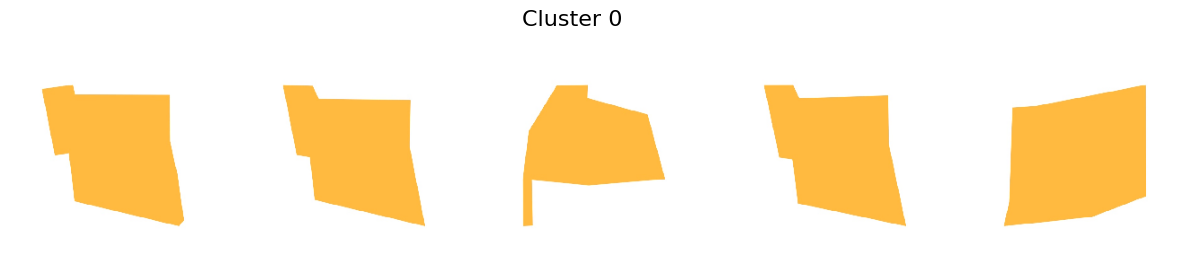

5 48


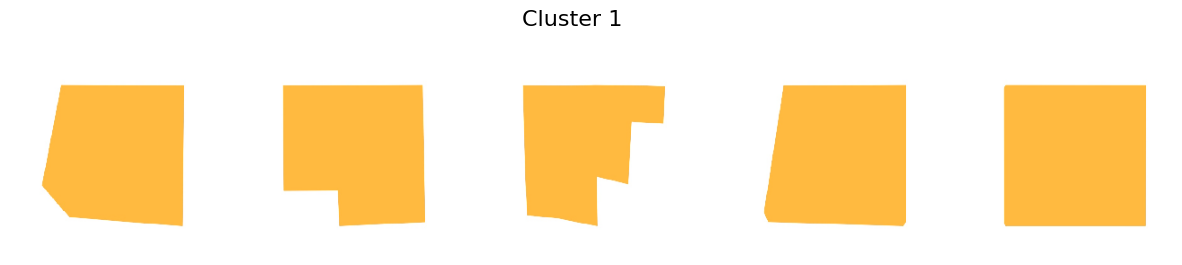

5 44


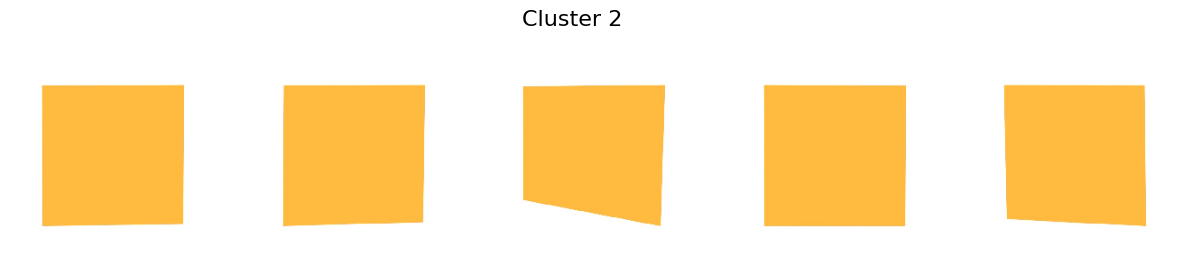

5 12


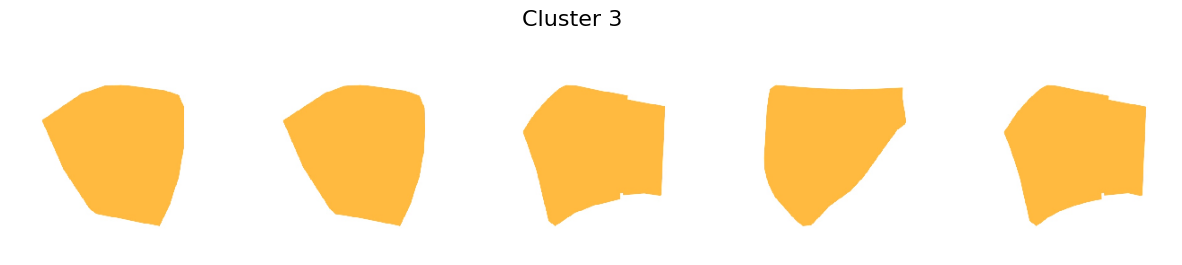

5 59


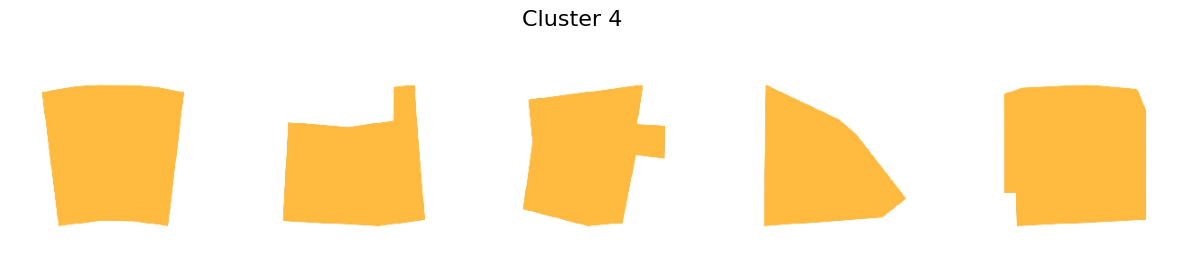

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Assuming 'unique_image_paths' contains the paths to the images
# and 'cluster_labels' contains the corresponding cluster labels

# Number of images to display per cluster
n_images_per_cluster = 5
# n_images_per_cluster = min(n_images_per_cluster, len(cluster_indices))

# Plot images from each cluster
for cluster_num in range(5):
    # Get the indices of images belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_num)[0]

    n_images_cluster = min(n_images_per_cluster, len(cluster_indices))
    print(n_images_cluster, len(cluster_indices))

    # Randomly select a few images from the cluster to display
    selected_indices = np.random.choice(cluster_indices, n_images_cluster, replace=False)

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Cluster {cluster_num}", fontsize=16)

    for i, img_idx in enumerate(selected_indices):
        img_path = unique_image_paths[img_idx]
        # print(img_path)
        # Load and display the image
        img = load_img(img_path, target_size=(224, 224))
        plt.subplot(1, n_images_per_cluster, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()


[10. 48. 44. 12. 59.]


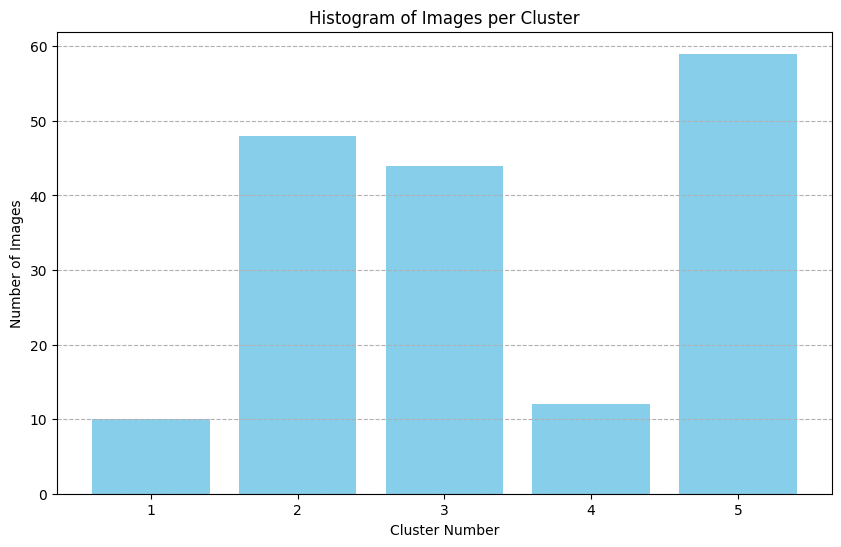

In [ ]:
  # Adjust for zero-based indexing

print(cluster_counts)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cluster_counts, color='skyblue')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Cluster')
plt.xticks(range(1, num_clusters + 1))  # Set x-ticks to cluster numbers
plt.grid(axis='y', linestyle='--')

# Show the histogram
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


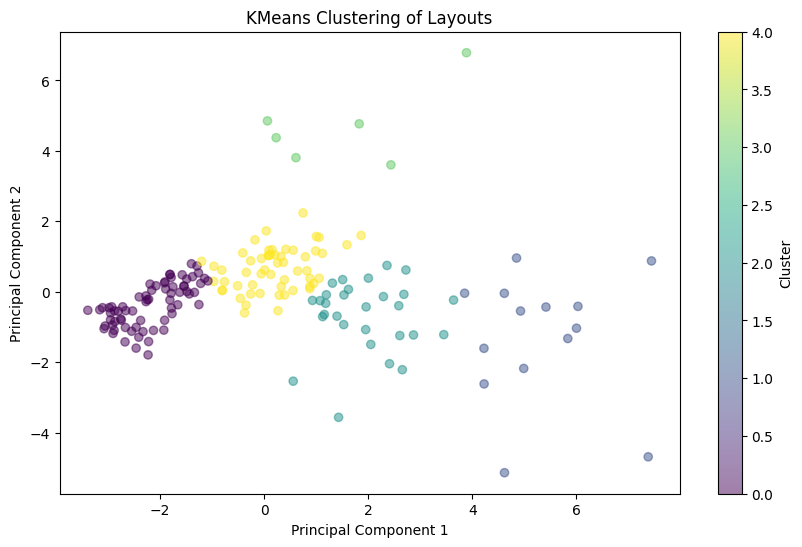

Cluster 0: Complexity -0.0844684953794815
Cluster 1: Complexity 0.5172912977610473
Cluster 2: Complexity 0.03318210028435685
Cluster 3: Complexity -0.2910745159154568
Cluster 4: Complexity -0.011447014549528078


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)  # You can adjust the number of components
X_pca = pca.fit_transform(scaled_features)

# Perform PCA for dimensionality reduction

# Perform KMeans clustering with 3 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Layouts')
plt.colorbar(label='Cluster')
plt.show()

# Determine the complexity of each cluster (you may need to adjust this based on your features)
cluster_complexity = [np.mean(scaled_features[cluster_labels == i]) for i in range(n_clusters)]

# Print the complexity of each cluster
for i, complexity in enumerate(cluster_complexity):
    print(f"Cluster {i}: Complexity {complexity}")




Histogram for number of edge distribution for each cluster

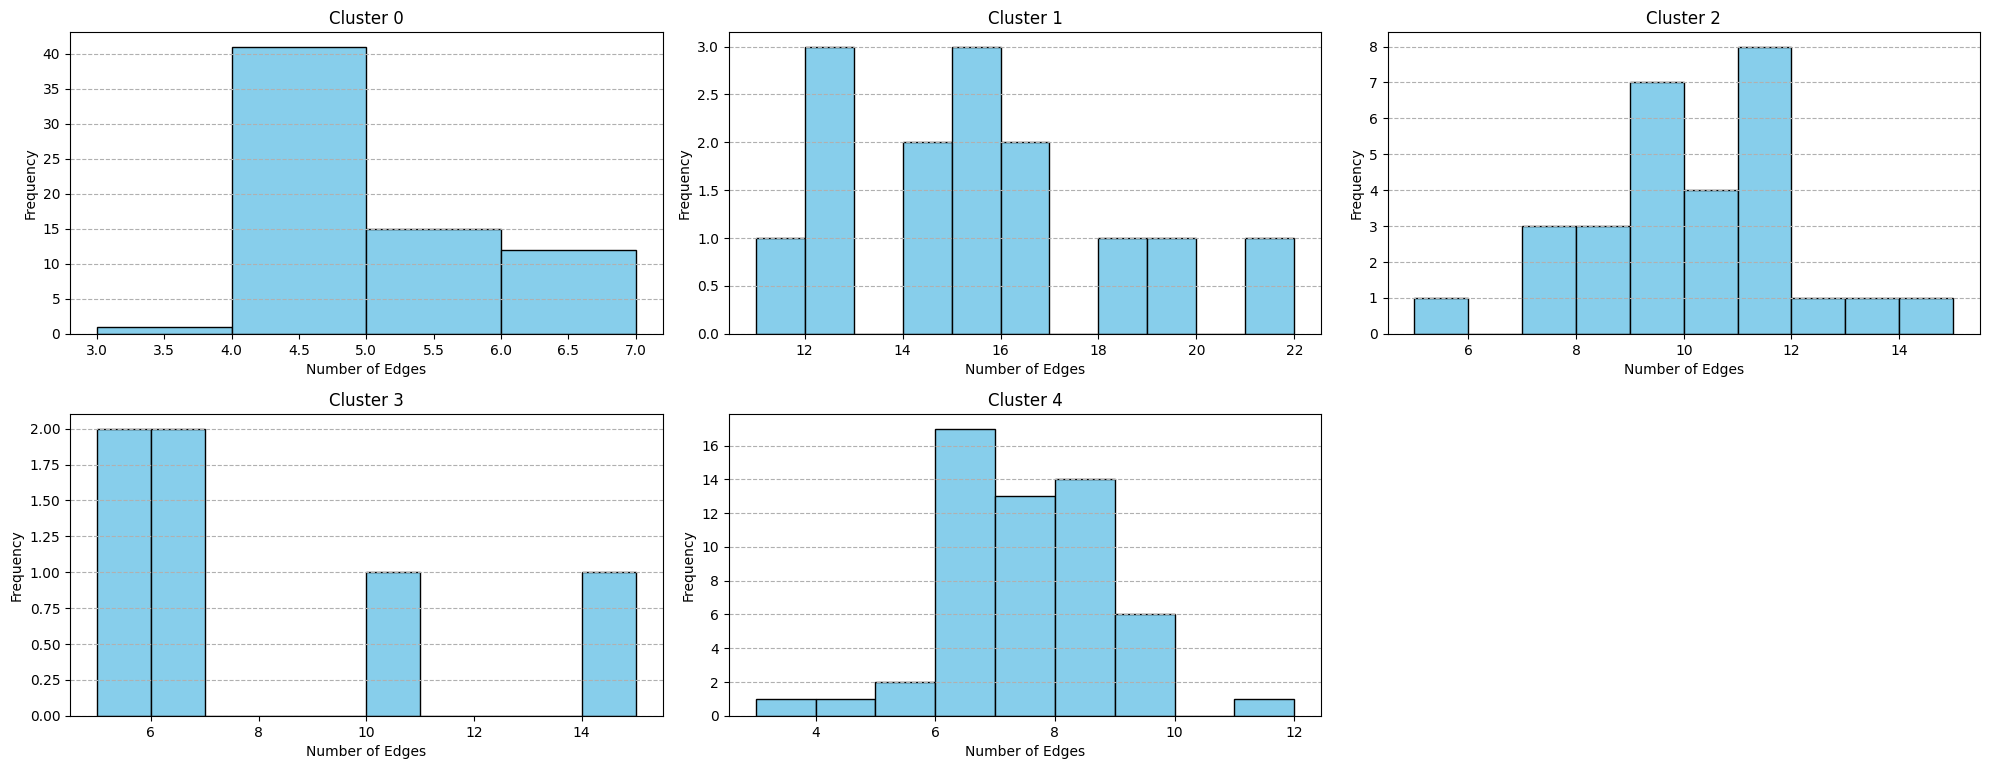

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
num_clusters = 5

# Create a figure for plotting histograms
plt.figure(figsize=(20, 15))

# Loop over each cluster and plot the histogram of number of edges
for cluster_id in range(0, num_clusters):  # Adjusted to range from 0 to 9
    # Get the number of edges for the current cluster
    TFP_num_edges_features = np.array(TFP_num_edges_features)
    cluster_labels = np.array(cluster_labels)

    cluster_edges = TFP_num_edges_features[cluster_labels == cluster_id]

    # Check if cluster_edges is not empty before plotting
    if len(cluster_edges) > 0:
        # Create a subplot for each cluster
        plt.subplot(4, 3, cluster_id + 1)  # Adjust layout based on the number of clusters

        # Plot histogram
        plt.hist(cluster_edges, bins=range(min(cluster_edges), max(cluster_edges) + 2), color='skyblue', edgecolor='black')
        plt.title(f'Cluster {cluster_id}')
        plt.xlabel('Number of Edges')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--')
    else:
        print(f"Cluster {cluster_id} has no images.")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




1.   Cluster 5 -> Highest frequency images -> Low complexity data -> 4 to 6 edges
2.   Cluster 0 -> 2nd Highest frequency images -> Medium complexity data -> 7 to 12 edges
3. Others -> above 13 edges -> High Complexity images



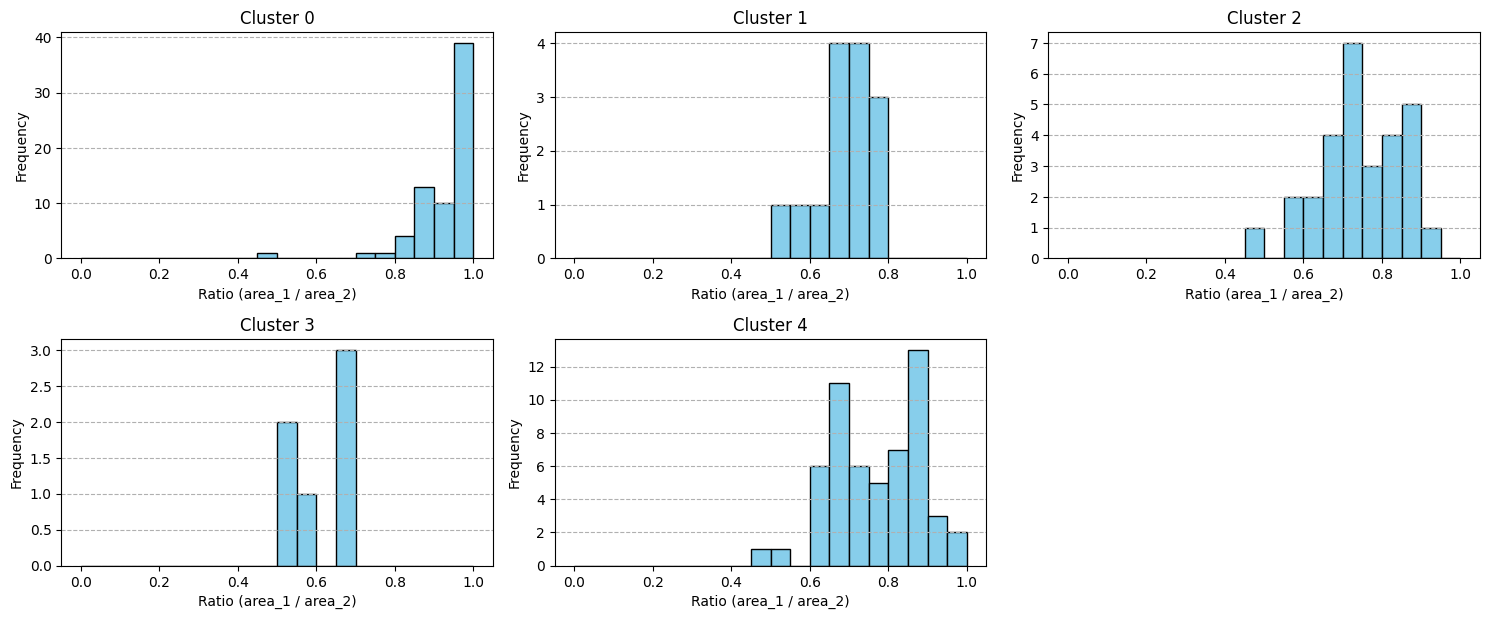

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


TFP_area_features = np.array(TFP_area_features)
TFB_area_features = np.array(TFB_area_features)

num_clusters = 5  # Adjust this to match the actual number of clusters

# Calculate the ratio
ratios = TFP_area_features / TFB_area_features

# Ensure ratios are between 0 and 1
ratios = np.clip(ratios, 0, 1)

# Plot histograms for each cluster
plt.figure(figsize=(15, 12))

for cluster_id in range(num_clusters):
    # Get the ratios for the current cluster
    cluster_ratios = ratios[cluster_labels == cluster_id]

    # Check if cluster_ratios is not empty before plotting
    if len(cluster_ratios) > 0:
        # Create a subplot for each cluster
        plt.subplot(4, 3, cluster_id + 1)  # Adjust layout based on the number of clusters

        # Plot histogram
        plt.hist(cluster_ratios, bins=np.linspace(0, 1, 21), color='skyblue', edgecolor='black')
        plt.title(f'Cluster {cluster_id}')
        plt.xlabel('Ratio (area_1 / area_2)')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--')
    else:
        print(f"Cluster {cluster_id} has no data.")

plt.tight_layout()  # Adjusts subplot spacing to avoid overlap
plt.show()






1.   Cluster 5 -> Highest frequency images -> Low complexity data -> 0.9 - 1
2.   Cluster 0 -> 2nd Highest frequency images -> Medium complexity data -> 0.8-0.9
3. Others -> above 13 edges -> High Complexity images ->all others



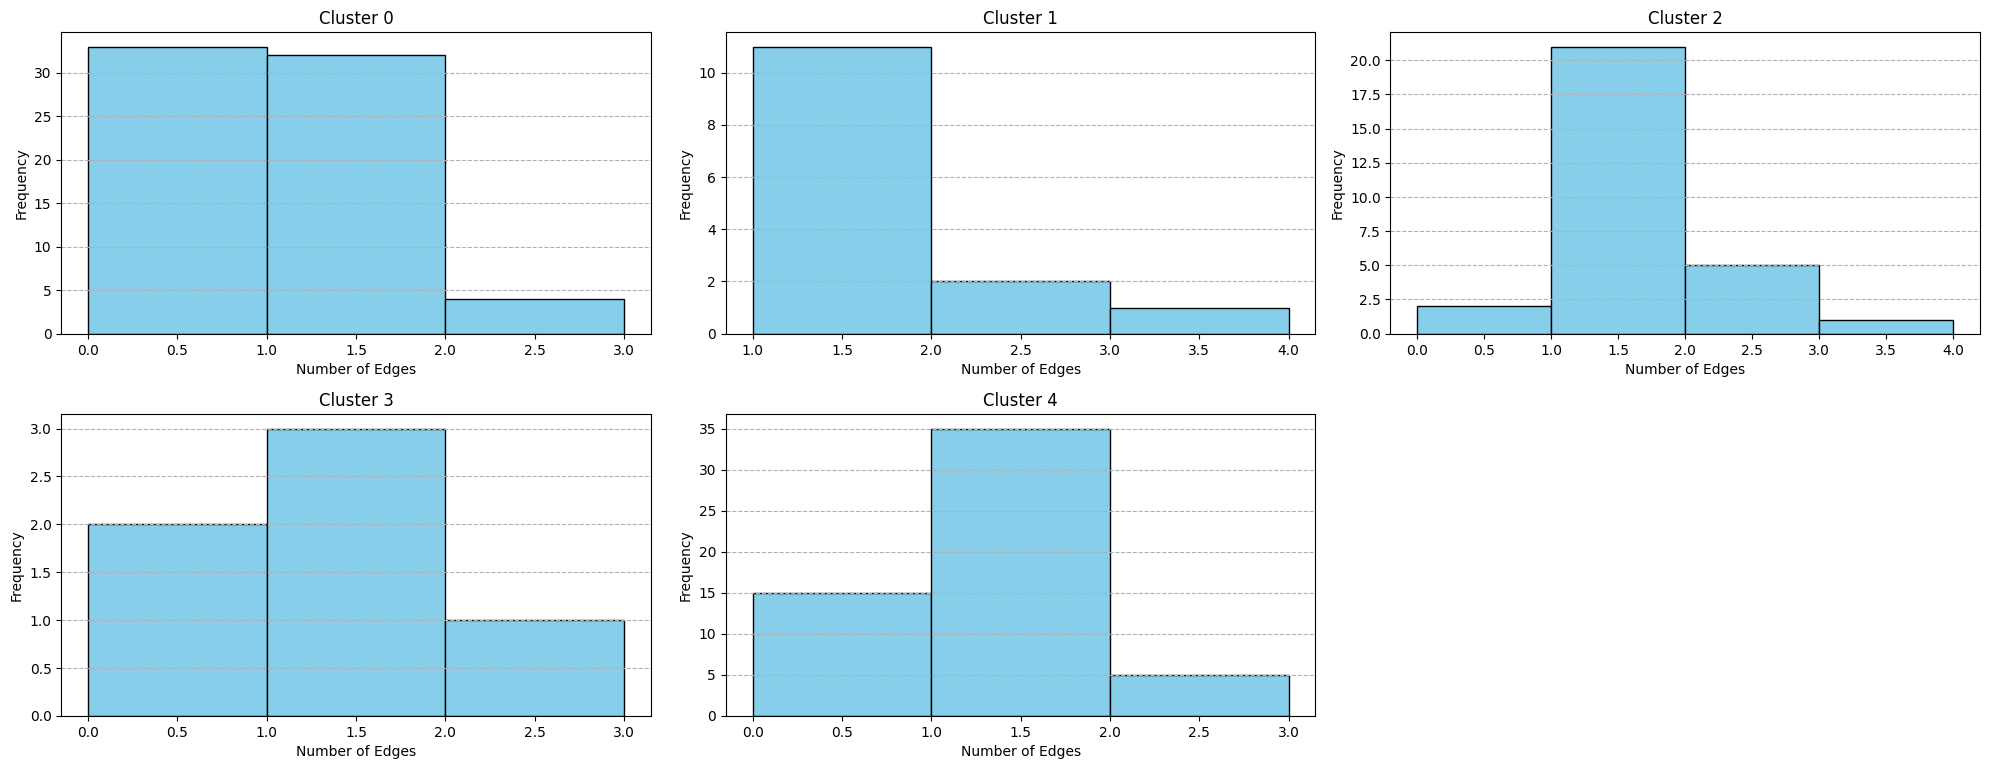

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
num_clusters = 5

# Create a figure for plotting histograms
plt.figure(figsize=(20, 15))

# Loop over each cluster and plot the histogram of number of edges
for cluster_id in range(0, num_clusters):  # Adjusted to range from 0 to 9
    # Get the number of edges for the current cluster
    TFP_defect_num_features = np.array(TFP_defect_num_features)
    cluster_labels = np.array(cluster_labels)

    cluster_edges = TFP_defect_num_features[cluster_labels == cluster_id]

    # Check if cluster_edges is not empty before plotting
    if len(cluster_edges) > 0:
        # Create a subplot for each cluster
        plt.subplot(4, 3, cluster_id + 1)  # Adjust layout based on the number of clusters

        # Plot histogram
        plt.hist(cluster_edges, bins=range(min(cluster_edges), max(cluster_edges) + 2), color='skyblue', edgecolor='black')
        plt.title(f'Cluster {cluster_id}')
        plt.xlabel('Number of Edges')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--')
    else:
        print(f"Cluster {cluster_id} has no images.")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

TFP_num_edges_features = np.array(TFP_num_edges_features)
TFP_area_features = np.array(TFP_area_features)
TFB_area_features = np.array(TFB_area_features)
TFP_defect_num_features = np.array(TFP_defect_num_features)

# Calculate the ratio
ratios = TFP_area_features / TFB_area_features
ratios = np.clip(ratios, 0, 1)  # Ensure ratios are between 0 and 1

# Initialize lists to hold selected images for each complexity
low_complexity_images = []
medium_complexity_images = []
high_complexity_images = []

left = []

# Track used indices to avoid duplication
used_indices = set()

print(len(TFP_num_edges_features))

# Loop through the images to classify them
for i in range(len(TFP_num_edges_features)):
    if i not in used_indices:  # Check if the image has already been used
        # print(i)
        edges = TFP_num_edges_features[i]
        ratio = ratios[i]
        defects = TFP_defect_num_features[i]

        # Check for low complexity
        if edges <= 6 or ratio >= 0.9:
            low_complexity_images.append(i)
            used_indices.add(i)  # Mark this index as used
            continue  # Skip to the next image

        # Check for medium complexity
        if 7 <= edges <= 12 or 0.75 <= ratio < 0.9 :
            medium_complexity_images.append(i)
            used_indices.add(i)  # Mark this index as used
            continue  # Skip to the next image

        # Check for high complexity
        # if edges > 12 or ratio < 0.8:
        high_complexity_images.append(i)
        used_indices.add(i)  # Mark this index as used
        continue  # Skip to the next image

# Output the selected images for each complexity level
print("Low Complexity Images Indices:", len(low_complexity_images))
print("Medium Complexity Images Indices:", len(medium_complexity_images))
print("High Complexity Images Indices:", len(high_complexity_images))




173
Low Complexity Images Indices: 100
Medium Complexity Images Indices: 63
High Complexity Images Indices: 10


In [ ]:
print(cluster_labels[27], TFB_length_features[27], TFB_width_features[27])

1 453.0 338.0


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from collections import Counter

# Example dataset: Replace with your actual dataset
# Each row represents an image with its features and cluster label
data = {
    'BB_length': TFB_length_features,  # Replace with actual BB_length data
    'BB_breadth': TFB_width_features,  # Replace with actual BB_breadth data
    'BB_area': TFB_area_features,  # Replace with actual area data
    'cluster_label': cluster_labels  # Replace with actual cluster labels
}

df = pd.DataFrame(data)

# Define the architect's input parameters
length = 453  # Example input, replace with actual input
width = 338  # Example input, replace with actual input
area = length * width
permissible_complexity = 'low'  # Example input, replace with actual input
num_similar_layouts = 7  # Example input, replace with actual input

# Define complexity criteria
if permissible_complexity == 'low':
    complexity_indices = low_complexity_images
elif permissible_complexity == 'medium':
    complexity_indices = low_complexity_images + medium_complexity_images
elif permissible_complexity == 'high':
    complexity_indices = low_complexity_images + medium_complexity_images + high_complexity_images

# Create a subset of the dataset based on the complexity
subset = df.loc[complexity_indices]

# Features for KNN
X = subset[['BB_length', 'BB_breadth', 'BB_area']].values

# Input query for KNN
query = np.array([[length, width, area]])

# Fit KNN model
knn = NearestNeighbors(n_neighbors=num_similar_layouts)
knn.fit(X)

# Find the K nearest neighbors
distances, indices = knn.kneighbors(query)

# Get the recommended layouts and their cluster labels
recommended_layouts = subset.iloc[indices[0]]
recommended_cluster_labels = recommended_layouts['cluster_label'].values

# Determine the majority cluster label
majority_label = Counter(recommended_cluster_labels).most_common(1)[0][0]

# Output the results
print("Recommended Layouts:")
print(recommended_layouts)
print("\nCluster Labels of Recommended Layouts:", recommended_cluster_labels)
print("Majority Cluster Label:", majority_label)


Recommended Layouts:
     BB_length  BB_breadth   BB_area  cluster_label
101      453.0       338.0  153114.0              0
69       453.0       338.0  153114.0              0
75       453.0       338.0  153114.0              0
119      453.0       338.0  153114.0              4
114      453.0       338.0  153114.0              0
104      453.0       338.0  153114.0              0
116      453.0       338.0  153114.0              0

Cluster Labels of Recommended Layouts: [0 0 0 4 0 0 0]
Majority Cluster Label: 0


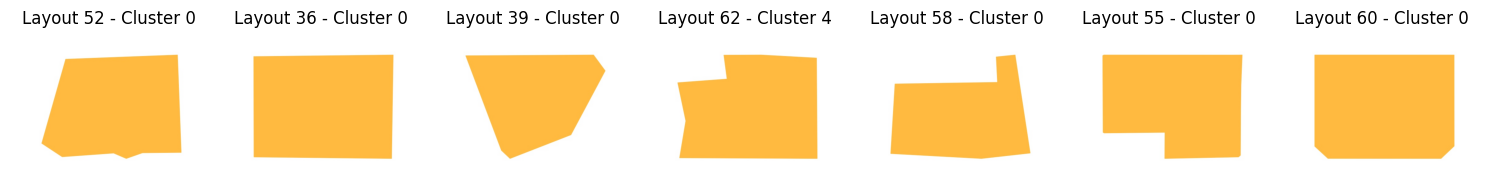

In [ ]:
# Display the recommended images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices[0]):
    image_path = unique_image_paths[idx]  # Get the image path for the recommended layout
    image = Image.open(image_path)  # Load the image

    plt.subplot(1, num_similar_layouts, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Layout {idx} - Cluster {recommended_cluster_labels[i]}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Layout 12 - Cluster 9')

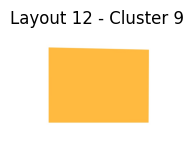

In [ ]:
plt.figure(figsize=(15, 5))
image_path = unique_image_paths[27]  # Get the image path for the recommended layout
image = Image.open(image_path)  # Load the image

plt.subplot(1, num_similar_layouts, i + 1)
plt.imshow(image)
plt.axis('off')
plt.title(f'Layout {12} - Cluster {9}')

In [ ]:
# Initialize a new array with None values
complexity_mapping = [None] * 173  # Assuming 173 total indices

# Map indices to their complexity categories
for index in low_complexity_images:
    complexity_mapping[index] = 'low'
for index in medium_complexity_images:
    complexity_mapping[index] = 'medium'
for index in high_complexity_images:
    complexity_mapping[index] = 'high'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a DataFrame with the relevant data
data = {
    'length': TFB_length_features,
    'width': TFB_width_features,
    'area': TFB_area_features,
    'complexity': complexity_mapping,
    'shape_family': cluster_labels
}

df = pd.DataFrame(data)

# Encode the complexity variable
df['complexity'] = df['complexity'].map({'low': 0, 'medium': 1, 'high': 2})

# Features and target variable
X = df[['length', 'width', 'area', 'complexity']].values
y = df['shape_family'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)


# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the results
print(f'Accuracy of the KNN Classifier: {accuracy * 100:.2f}%')


[[-0.13207052  0.54280641  0.59409831 -0.98798097]
 [ 0.00974293  0.4334038   0.62797565  0.29713713]
 [ 0.21565467 -1.00034785 -1.05836586  1.58225523]
 [ 0.74068737 -1.26282229 -0.78189     1.58225523]
 [ 0.4132225   0.02668432  0.58677216 -0.98798097]
 [-0.73257676  0.5190893  -0.20652208  0.29713713]
 [ 0.08071125  0.46532159  0.76178532  0.29713713]
 [ 1.59165606 -2.06944081 -0.89804838  1.58225523]
 [ 0.30300723 -0.77290228 -0.64200896  1.58225523]
 [-0.78174489  0.15967604 -0.74322589  0.29713713]
 [ 0.08071565  0.46532716  0.76179848 -0.98798097]
 [-0.20183114  0.37993663  0.28612392  0.29713713]
 [-1.13735203 -0.59894892 -2.18194627  0.29713713]
 [-0.16228062  0.53397406  0.54352685 -0.98798097]
 [ 0.580985   -0.59089017 -0.05085129  1.58225523]
 [-0.06345161  0.46532716  0.5775688   1.58225523]
 [ 0.01320544  0.19650255  0.31231447  0.29713713]
 [-0.3024486   0.4485891   0.24976126  0.29713713]
 [ 0.08071565  0.46532716  0.76179848  0.29713713]
 [ 0.16895034 -0.63002077 -0.61

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

complexity_strings = np.array(complexity_mapping)

complexity_mappings = {
    'low': 0,
    'medium': 1,
    'high': 2
}

# Convert using the mapping
complexity_numeric = np.array([complexity_mappings[c] for c in complexity_strings])

# print(complexity_numeric)
ratios = np.array(TFP_area_features) / np.array(TFB_area_features)
ratios = np.clip(ratios, 0, 1)


# Assuming you have defined your feature arrays (length, width, area, complexity) and cluster labels
edges = np.array(TFP_num_edges_features)
length = np.array(TFB_length_features)  # Your length data
width = np.array(TFB_width_features)   # Your width data
area1 = np.array(TFB_area_features)   # Your area data
defects = np.array(TFP_defect_num_features)
area2 = np.array(TFP_area_features)
ratios = np.array(ratios)
complexity = complexity_numeric  # Your complexity data (0, 1, 2)
cluster_labels = np.array(cluster_labels)  # Your cluster labels (0, 1, 2, ..., n)

# Step 1: Create the feature matrix X and target vector y
X = np.column_stack(( length, width, area1, complexity, edges))  # Combine features into a single array
y = cluster_labels  # Target labels as cluster labels

# Step 3: Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Fit and transform on training data

# X_train_scaled(complexity)
# X = np.column_stack((X, np.array(complexity)))

# Step 2: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train)

# Step 4: Train the KNN model
k = 5  # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)  # Fit the model on scaled training data

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.57%


With n = 3 91.43 and n=5 88.7 epsilon = 0.001

In [ ]:
idx = 121
print(cluster_labels[idx], TFB_length_features[idx], TFB_width_features[idx], TFP_defect_num_features[idx], TFP_num_edges_features[idx])

1 449.7659912109375 334.4067077636719 1 19


In [ ]:
# Example input values
input_length = 449 # Example length
input_width = 334   # Example width
input_area = input_length*input_width  # Example area
input_complexity = 0 # Complexity (0 = low, 1 = medium, 2 = high)

defects = 1
edges = 6
ratios = 0.5
# Combine the inputs into a feature vector
input_vector = np.array([[input_length, input_width, input_area, input_complexity, edges]])
# Scale the input vector using the same scaler used for training
input_vector_scaled = scaler.transform(input_vector)


In [ ]:
# Get the indices of the K nearest neighbors
k = 5  # Number of recommendations
distances, indices = knn.kneighbors(input_vector_scaled, n_neighbors=k)


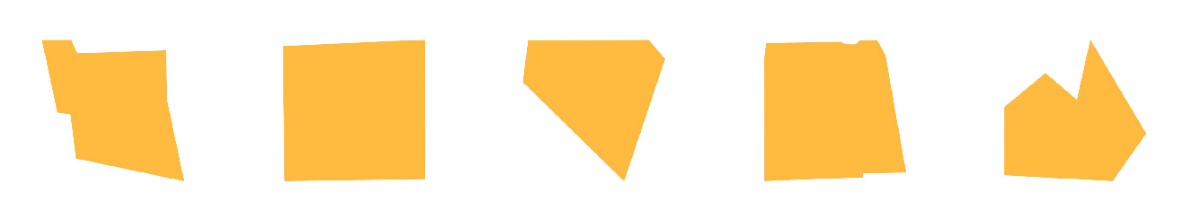

In [ ]:
# Retrieve the image paths for the recommended images
recommended_image_paths = [unique_image_paths[idx] for idx in indices[0]]

# Display the recommended images
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

plt.figure(figsize=(15, 3))
for i, img_path in enumerate(recommended_image_paths):
    img = load_img(img_path, target_size=(224, 224))
    plt.subplot(1, len(recommended_image_paths), i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


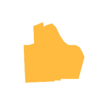

In [ ]:
img = load_img(unique_image_paths[121], target_size=(224, 224))
plt.subplot(1, len(recommended_image_paths), i+1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 5  0  0  0]
 [ 0 15  0  1]
 [ 0  0  1  0]
 [ 1  1  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00         1
           4       0.92      0.85      0.88        13

    accuracy                           0.91        35
   macro avg       0.92      0.95      0.93        35
weighted avg       0.92      0.91      0.91        35



Explained Variance Ratio: [0.97767228 0.02230426]


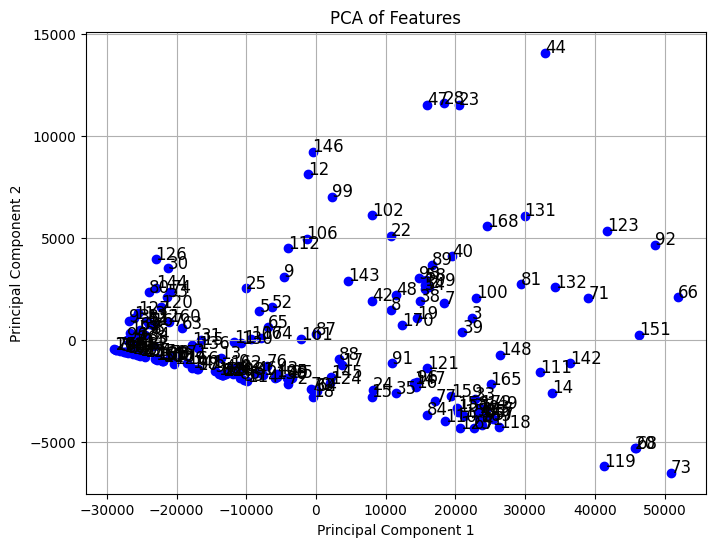

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a DataFrame
df = pd.DataFrame(merged_features)

# Extract values for PCA
features = df.values  # Get all features as a NumPy array

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(features)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', color='blue')

# Annotate points
for i, txt in enumerate(range(len(features))):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]), fontsize=12)

plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [ ]:
# Function to extract contour-related features from an image
def extract_contour_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # plt.imshow(binary, cmap='gray')
    # plt.title('Grayscale Image')
    # plt.axis('off')
    # plt.show()

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Calculate contour features

    # image_with_contours = image.copy()
    # cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
    # cv2_imshow(image_with_contours)

    contour_features = []
    for contour in contours:
        # Calculate contour area
        area = cv2.contourArea(contour)
        # Calculate contour perimeter
        perimeter = cv2.arcLength(contour, closed=True)

        epsilon = 0.01 * perimeter
        approx = cv2.approxPolyDP(contour, epsilon, True)
        # num_corners = len(approx)
        num_edges = len(contour)
        # Append contour features
        contour_features.append([num_edges, area, perimeter])
    return contour_features

In [ ]:
# Extract color features from each image
feature_vectors = []

# image = cv2.imread('/content/images/1083.jpg')
# cv2_imshow(image)
# features = extract_contour_features(image)

for path in image_paths:
    # Read the image
    image = cv2.imread(path)
    features = extract_contour_features(image)
    feature_vectors.append(features)

print(feature_vectors)

[[[74, 134729.5, 1565.4974738359451]], [[334, 130779.5, 1508.1736608743668]], [[506, 107648.5, 1403.7615364789963]], [[401, 100999.5, 1459.452878832817]], [[109, 146799.5, 1550.9533175230026]], [[352, 131862.0, 1554.558436870575]], [[242, 136897.5, 1572.315795660019]], [[391, 105226.5, 1469.9137754440308]], [[558, 112773.0, 1348.0285626649857]], [[241, 128220.0, 1535.7056245803833]], [[188, 140526.5, 1524.007140159607]], [[217, 135455.5, 1484.1736624240875]], [[256, 125420.0, 1511.847759962082]], [[221, 137219.5, 1516.1492756605148]], [[179, 89754.5, 1532.8355666399002]], [[383, 115368.0, 1510.7005722522736]], [[490, 108930.5, 1554.531087398529]], [[109, 146799.5, 1550.9533175230026]], [[427, 119750.5, 1473.2274836301804]], [[76, 123997.5, 1560.8111820220947]], [[658, 109086.0, 1344.513845205307]], [[675, 76818.0, 1379.1757488250732]], [[242, 137162.5, 1572.6589422225952]], [[364, 113319.0, 1487.3868639469147]], [[537, 103675.5, 1412.9574879407883]], [[491, 114901.5, 1438.482316851616]

**Removing Duplicates**

In [ ]:
unique_images = set()
unique_image_paths = []

feature_vectors = np.array(feature_vectors)
features = feature_vectors.reshape(-1, 3)

for i in range(0, 1183):
  edge = features[i][0]
  area = features[i][1]
  peri = features[i][2]

  # print((edge, area, peri))

  if (edge, area, peri) not in unique_images:
        # Add the image properties to the set
        unique_images.add((edge, area, peri))
        # Add the image path to the array
        unique_image_paths.append(image_paths[i])

print(len(unique_image_paths))

173


In [ ]:
unique_image_features = []
unique_images_list = unique_images.copy()

for i in range(len(unique_images)):
  image_features = list(unique_images_list.pop())
  unique_image_features.append(image_features)

print(np.shape(unique_image_features))

(173, 3)


**Tight-Fitting Box**

<ipython-input-70-bf4756048500>:34: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box_points = cv2.boxPoints(min_box).astype(np.int0)


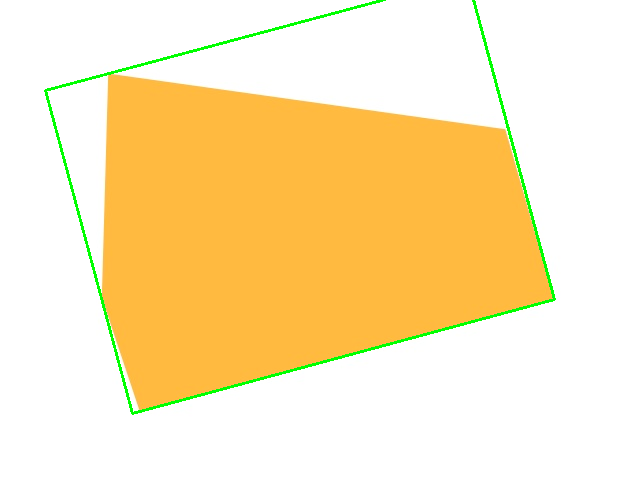

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Function to find tight-fitting bounding box and calculate its length and width
def calculate_tight_fitting_box(image):
    # Convert the image to grayscale

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour = max(contours, key=cv2.contourArea)

    # Find the oriented bounding box for the contour
    oriented_box = cv2.minAreaRect(contour)

    # Extract the length and width of the oriented bounding box
    length = max(oriented_box[1])
    width = min(oriented_box[1])

    return length, width, oriented_box

# Read an image
image = cv2.imread('/content/images/0171.jpg')

# Calculate the tight-fitting bounding box and its length, width, and coordinates
length, width, min_box = calculate_tight_fitting_box(image)

# Draw the tight-fitting bounding box on the image
image_with_box = image.copy()
box_points = cv2.boxPoints(min_box).astype(np.int0)
cv2.drawContours(image_with_box, [box_points], 0, (0, 255, 0), 2)

# Display the image with the tight-fitting bounding box
cv2_imshow(image_with_box)


In [ ]:
# Extract color features from each image
tight_fit_features = []

for path in unique_image_paths:
    # Read the image
    image = cv2.imread(path)
    length, width, min_box = calculate_tight_fitting_box(image)
    tight_fit_features.append([length, width])

print(tight_fit_features)

[[450.0480651855469, 338.8497009277344], [452.0154113769531, 337.64990234375], [454.8719787597656, 321.92620849609375], [462.1556396484375, 319.0476989746094], [457.61279296875, 333.1894836425781], [441.7173767089844, 338.589599609375], [452.99993896484375, 337.99993896484375], [473.9609375, 310.20166015625], [456.08380126953125, 324.4205627441406], [441.0352783203125, 334.6479797363281], [453.0, 338.0], [449.0802917480469, 337.06353759765625], [436.1020202636719, 326.3282775878906], [449.62896728515625, 338.7528381347656], [459.94012451171875, 326.4166564941406], [451.0, 338.0], [452.0634460449219, 335.0518493652344], [447.6844482421875, 337.8164367675781], [453.0, 338.0], [454.22406005859375, 325.9875183105469], [452.0, 336.0], [453.0, 338.0], [438.5762939453125, 329.1494445800781], [446.5874938964844, 307.14630126953125], [464.5645751953125, 327.37579345703125], [450.5166931152344, 329.8821716308594], [453.0, 338.0], [453.0, 338.0], [479.1339416503906, 286.4784240722656], [453.0, 33

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

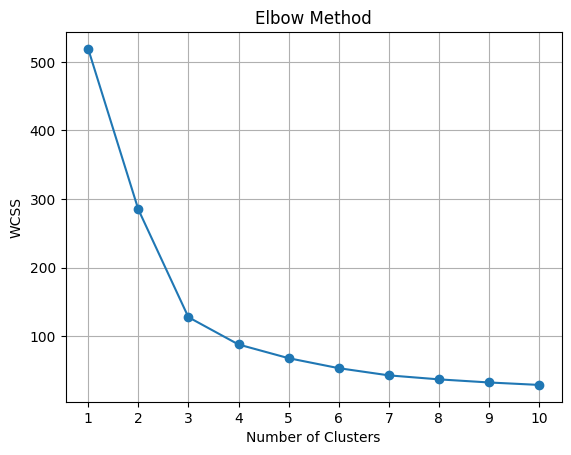

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = np.array(unique_image_features)
# X_new = np.concatenate((tight_fit_features, X), axis=1)

# Scale the feature vectors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Convert feature list to numpy array
X = np.array(unique_image_features)
# X = X.reshape(-1, 3)
# print(X.shape)
# X_new = np.concatenate((tight_fit_features, X), axis=1)
X_new = X
print(np.shape(X_new))

(173, 3)


**KMEANS**

In [ ]:
# Scale the feature values
# X = X.reshape(-1, 2)
X = X_new

print(X.shape)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Define the number of clusters (low, medium, high complexity)
n_clusters = 3

# Build the KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Create a pipeline with scaling and clustering
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to the data
pipeline.fit(X)

# Get the cluster labels
cluster_labels = pipeline.predict(X)

# Print the cluster labels for each contour
for i, label in enumerate(cluster_labels):
    print(f"Contour {i+1}: Complexity cluster {label}")

(173, 3)
Contour 1: Complexity cluster 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Contour 2: Complexity cluster 0
Contour 3: Complexity cluster 1
Contour 4: Complexity cluster 0
Contour 5: Complexity cluster 0
Contour 6: Complexity cluster 0
Contour 7: Complexity cluster 1
Contour 8: Complexity cluster 0
Contour 9: Complexity cluster 0
Contour 10: Complexity cluster 1
Contour 11: Complexity cluster 1
Contour 12: Complexity cluster 1
Contour 13: Complexity cluster 0
Contour 14: Complexity cluster 1
Contour 15: Complexity cluster 1
Contour 16: Complexity cluster 1
Contour 17: Complexity cluster 0
Contour 18: Complexity cluster 0
Contour 19: Complexity cluster 1
Contour 20: Complexity cluster 0
Contour 21: Complexity cluster 0
Contour 22: Complexity cluster 1
Contour 23: Complexity cluster 1
Contour 24: Complexity cluster 1
Contour 25: Complexity cluster 0
Contour 26: Complexity cluster 1
Contour 27: Complexity cluster 0
Contour 28: Complexity cluster 0
Contour 29: Complexity cluster 0
Contour 30: Complexity cluster 0
Contour 31: Complexity cluster 0
Contour 32: Compl

**HIERARCHICAL**

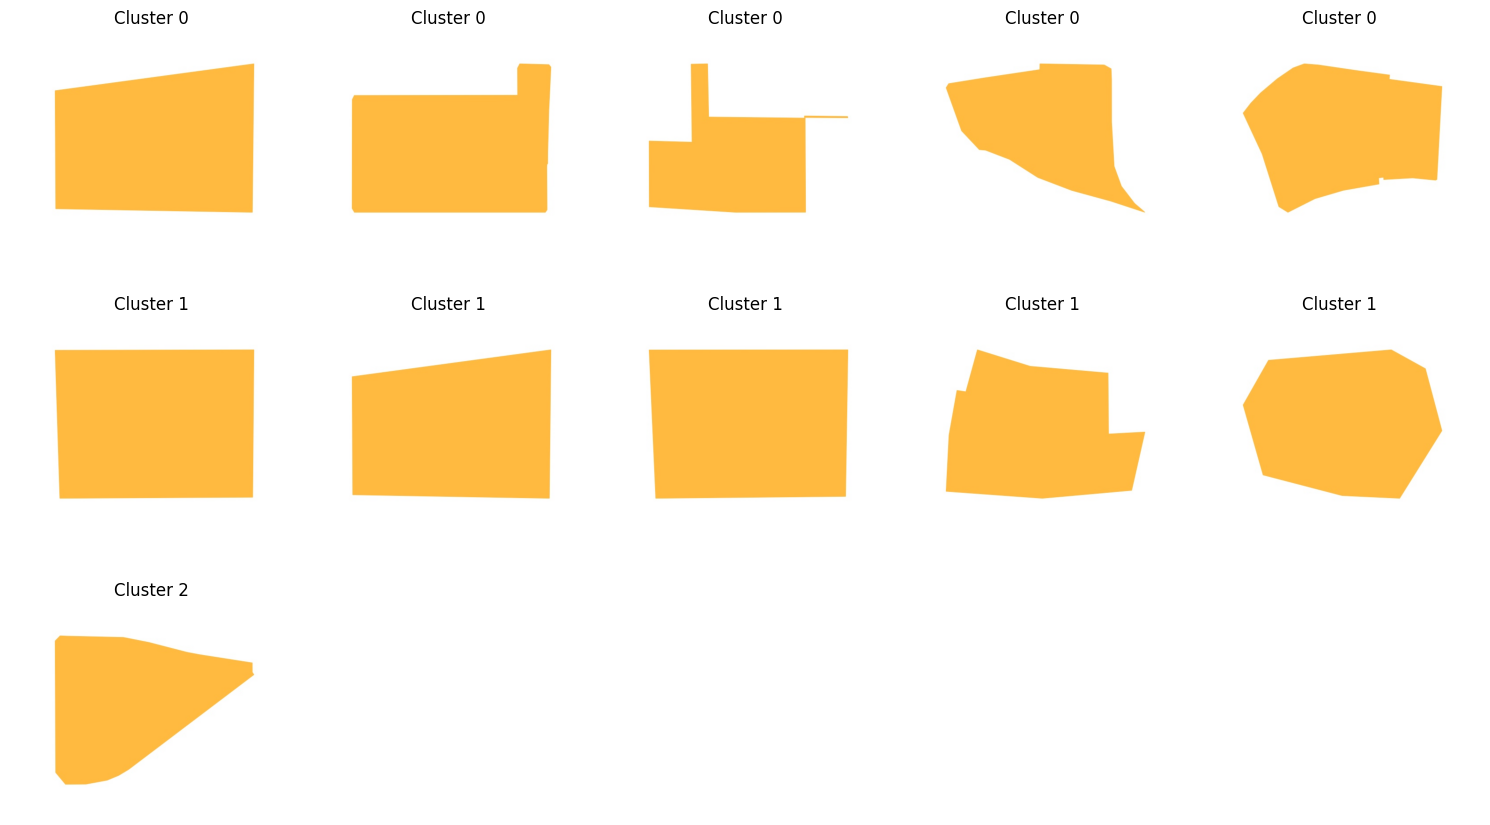

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import random
# Initialize the hierarchical clustering model
n_clusters = 3  # Number of clusters for low, medium, high complexity
clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the scaled data
clustering.fit(X_scaled)

# Get image paths for each cluster
cluster_image_paths = [[] for _ in range(n_clusters)]
for i, label in enumerate(clustering.labels_):
    cluster_image_paths[label].append(image_paths[i])

# Plot a few images from each cluster
num_images_per_cluster = 5
plt.figure(figsize=(15, 9))
for cluster_index, image_paths_cluster in enumerate(cluster_image_paths):
    random.shuffle(image_paths_cluster)  # Shuffle to get random images
    for i in range(min(num_images_per_cluster, len(image_paths_cluster))):
        image_path = image_paths_cluster[i]
        image = plt.imread(image_path)
        plt.subplot(n_clusters, num_images_per_cluster, cluster_index * num_images_per_cluster + i + 1)
        plt.imshow(image)
        plt.title(f'Cluster {cluster_index}')
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Function to display images
import matplotlib.pyplot as plt
def display_images(image_paths):
    plt.figure(figsize=(20, 8))
    for i, path in enumerate(image_paths, 1):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(image_paths), i)
        plt.imshow(image)
        plt.axis('off')
    plt.show()
print(cluster_labels)

[1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 0 1 0 2 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1]


Cluster 1:


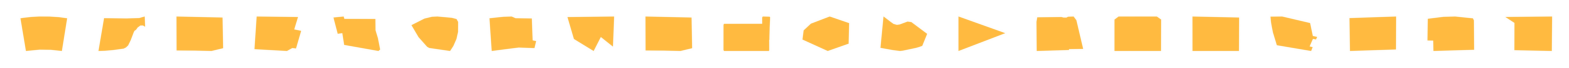

Cluster 2:


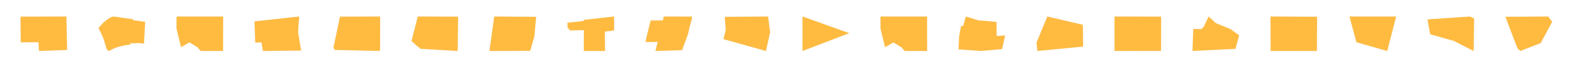

Cluster 3:
['/content/images/0088.jpg']


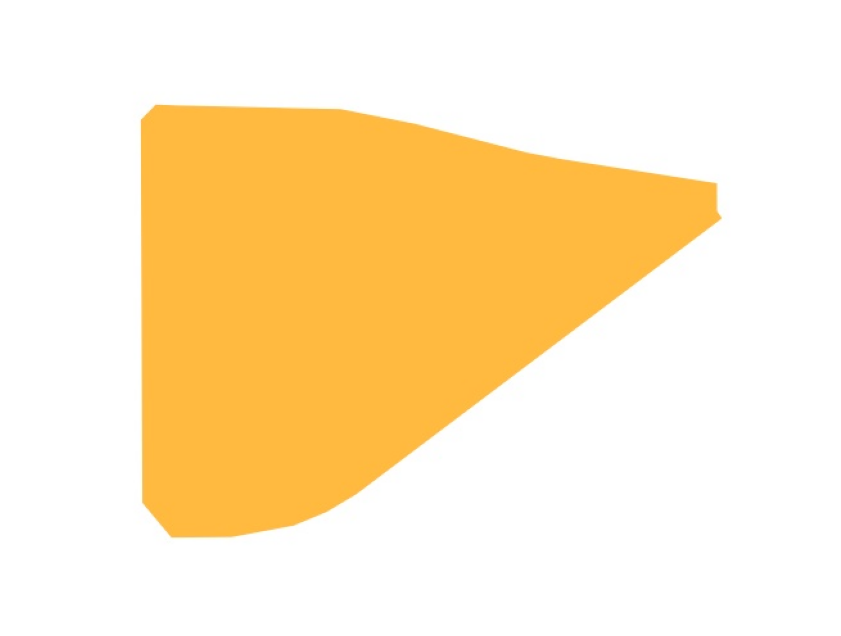

In [ ]:
# Create lists to store image paths for each cluster
cluster_image_paths = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    if len(cluster_image_paths[label]) < 20:  # Limiting to 100 images per cluster
        cluster_image_paths[label].append(image_paths[i])

# Display images for each cluster
for cluster_index, image_paths_cluster in enumerate(cluster_image_paths):
    print(f"Cluster {cluster_index+1}:")
    if(cluster_index+1 == 3):
      print(image_paths_cluster)
    display_images(image_paths_cluster)


**VGG16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
# Function to extract features using a pre-trained CNN model (VGG16)
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.vgg16.preprocess_input(x)
    features = model.predict(x)
    return features

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

553467096/553467096 [==============================] - 7s 0us/step


In [ ]:
# Extract features for all images
X_vgg = [extract_features(img_path) for img_path in unique_image_paths]

1/1 [==============================] - 1s 516ms/step


(173, 1, 4096)
(173, 4096)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


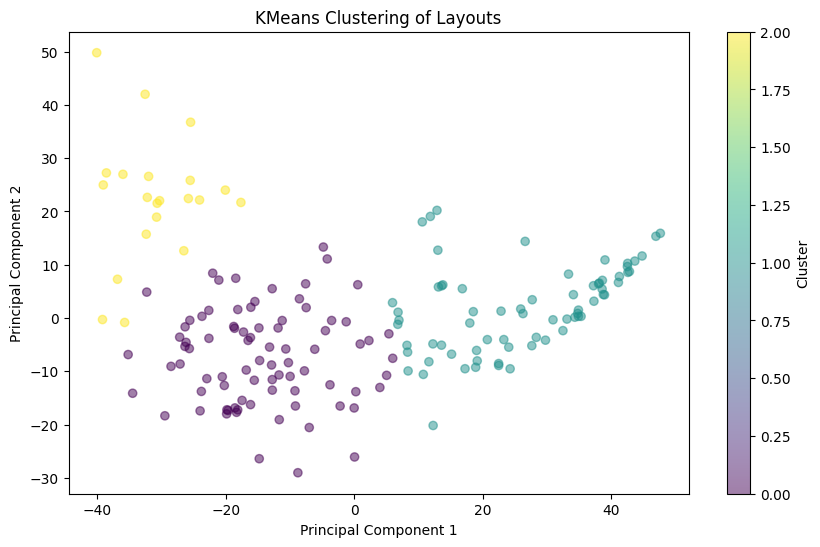

Cluster 0: Complexity 0.005163462366908789
Cluster 1: Complexity -0.03343946486711502
Cluster 2: Complexity 0.09130281209945679


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X contains the feature vectors
# X = np.array(feature_vectors)

print(np.shape(X_vgg))
X_vgg = np.array(X_vgg)
X_vgg = np.squeeze(X_vgg, axis=1)

print(np.shape(X_vgg))
# Scale the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vgg)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=4)  # You can adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# Perform PCA for dimensionality reduction

# Perform KMeans clustering with 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Layouts')
plt.colorbar(label='Cluster')
plt.show()

# Determine the complexity of each cluster (you may need to adjust this based on your features)
cluster_complexity = [np.mean(X_scaled[cluster_labels == i]) for i in range(n_clusters)]

# Print the complexity of each cluster
for i, complexity in enumerate(cluster_complexity):
    print(f"Cluster {i}: Complexity {complexity}")




In [ ]:
# # X[0]
# np.shape(X)
# X_cpy = X.copy()

print(cluster_labels)

[1 0 2 2 1 0 1 0 2 0 0 0 0 1 0 0 0 0 1 2 0 1 0 2 0 0 1 1 2 1 1 0 1 2 1 0 1
 0 0 0 2 0 2 0 0 1 0 0 2 1 1 1 0 1 2 1 0 0 0 1 1 1 1 0 0 0 2 2 0 1 0 2 0 1
 1 1 1 2 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 2 0 0 0 0
 0 0 1 1 1 1 0 0 1 1 2 1 2 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 0 0 2 1 1 1 1 0 1 0 0 2 1 0 1 1 0 2 1 1 0 0 0 0 0]


In [ ]:
# X_cpy = np.array(X_cpy)
# X_reshaped = X_cpy.reshape(X_cpy.shape[0], -1)
print(np.array(X_scaled).shape)

(173, 4096)


Cluster 0:


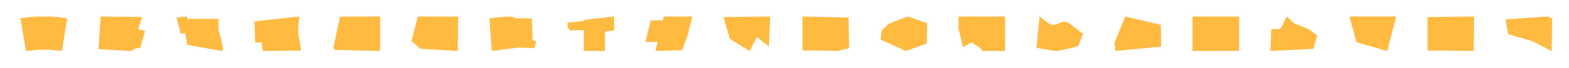

Cluster 1:


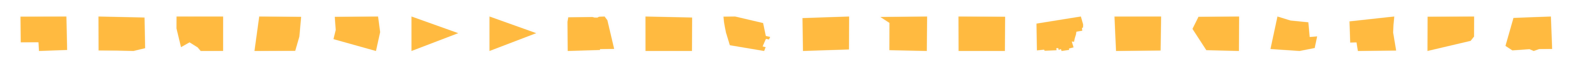

Cluster 2:


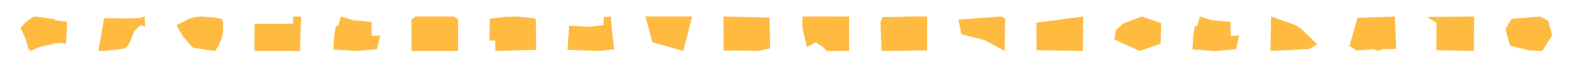

In [ ]:
# Create lists to store image paths for each cluster
cluster_image_paths = [[] for _ in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    if len(cluster_image_paths[label]) < 20:  # Limiting to 100 images per cluster
        cluster_image_paths[label].append(image_paths[i])

# Display images for each cluster
for cluster_index, image_paths_cluster in enumerate(cluster_image_paths):
    print(f"Cluster {cluster_index}:")
    display_images(image_paths_cluster)


In [ ]:
features = np.array(unique_image_features)
# features = features.reshape(-1, 3)
print(np.shape(features))

(173, 3)


In [ ]:
final_features = np.concatenate((features, tight_fit_features, cluster_labels[:, np.newaxis]), axis=1)
print(np.shape(final_features))
# print(image_paths)


(173, 6)


**Recommendation System**

In [ ]:
from sklearn.neighbors import NearestNeighbors
X = final_features
y = unique_image_paths

# print(np.shape(X))
# X = np.squeeze(X, axis=1)

nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)

input_edges = 738
input_area = 268
input_perimeter = 3100
input_length = 464
input_width = 324
input_cluster = 0

input_values = [[input_edges, input_area, input_perimeter, input_length, input_width, input_cluster]]

print(np.shape(input_values))

input_features = input_values  # Input features for which you want to find nearest neighbors
distances, indices = nbrs.kneighbors(input_features)

# Retrieve images corresponding to nearest neighbors
nearest_images = [unique_image_paths[idx] for idx in indices[0]]
print(nearest_images)

(1, 6)
['/content/images/0129.jpg', '/content/images/0126.jpg', '/content/images/0005.jpg', '/content/images/0396.jpg', '/content/images/0131.jpg']


/content/images/0129.jpg


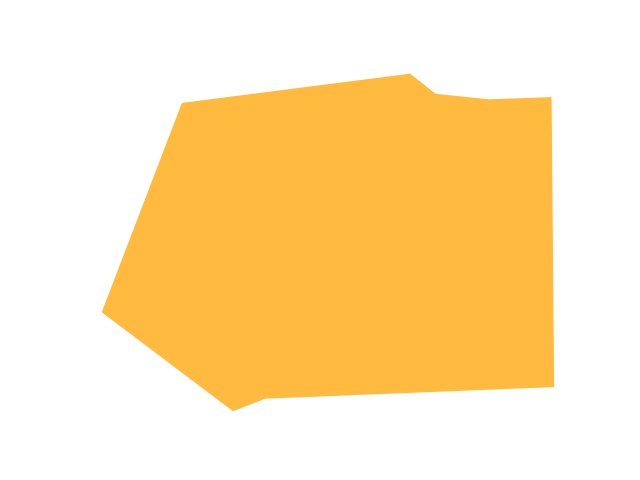

/content/images/0126.jpg


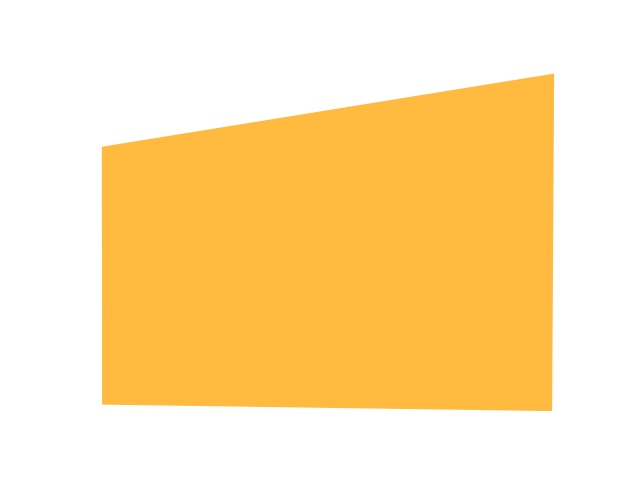

/content/images/0005.jpg


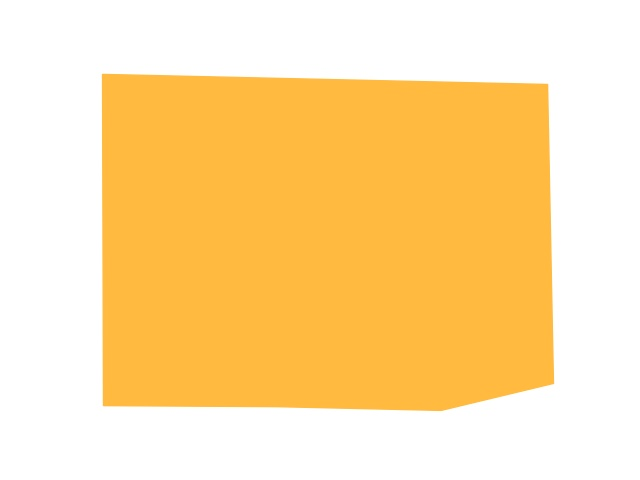

/content/images/0396.jpg


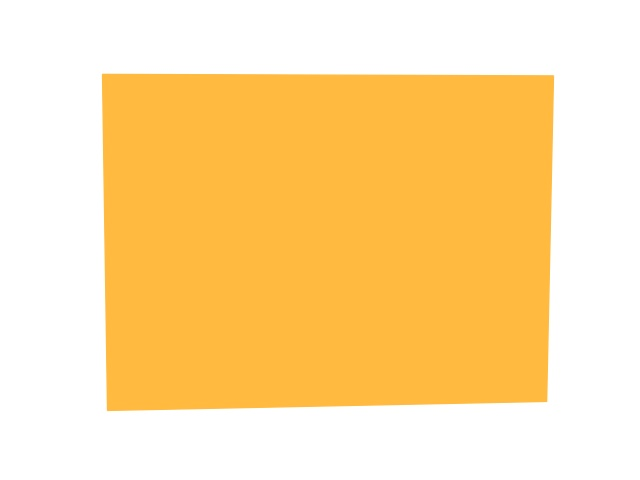

/content/images/0131.jpg


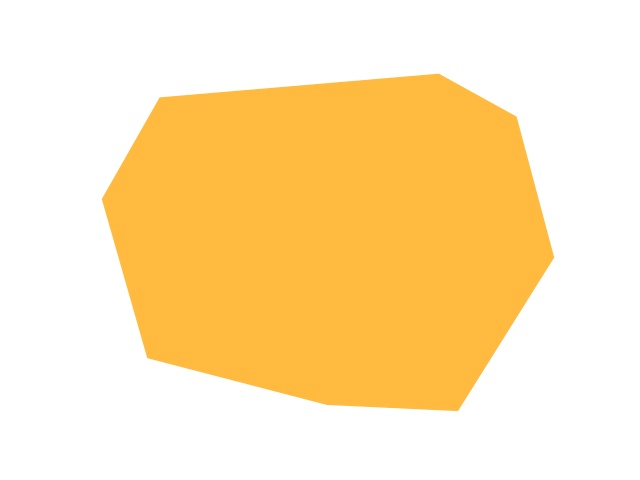

In [ ]:
for image_index in nearest_images:
    # Load and display the image corresponding to the predicted index
    print(image_index)
    image_path = image_index
    image = cv2.imread(image_path)
    cv2_imshow(image)

In [ ]:
import pandas as pd

X_new = np.concatenate((features, tight_fit_features), axis=1)

# Convert features (X) to a pandas DataFrame
X_df = pd.DataFrame(X_new, columns=['edges', 'area', 'perimeter', 'length', 'width'])

# Convert cluster labels (y) to a pandas Series
y_series = pd.Series(cluster_labels, name='cluster_labels')

data = pd.concat([X_df, y_series], axis=1)

grouped = data.groupby('cluster_labels')

# Calculate the minimum and maximum values for each feature within each cluster
min_max_values = grouped.agg({'length': ['min', 'max'],
                              'width': ['min', 'max'],
                              'edges': ['min', 'max'],
                              'area': ['min', 'max'],
                              'perimeter': ['min', 'max']})

print(min_max_values)



                    length                   width             edges         \
                       min         max         min         max   min    max   
cluster_labels                                                                
0               389.318176  521.882385  284.529419  364.246368  20.0  738.0   
1               404.187805  459.368408  323.695099  356.608521  17.0  721.0   
2               386.389313  483.479767  286.478424  375.567169  31.0  583.0   

                   area              perimeter               
                    min       max          min          max  
cluster_labels                                               
0                 267.0  152275.5  1328.697599  3100.802293  
1               72171.0  152961.5  1301.508784  1621.259009  
2               84823.5  151266.5  1286.278347  1572.284271  


**Neural Network**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

X = final_features

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

scale_factor_area = 2.0
scale_factor_cluster = 2.0
scale_factor_length = 2.0
scale_factor_width = 2.0

# # Multiply area and perimeter by the scale factors
# X[:, 1] *= scale_factor_area
# X[:, 3] *= scale_factor_length
# X[:, 4] *= scale_factor_width
# X[:, 5] *= scale_factor_cluster

y = unique_image_paths

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# print(y)


# Step 1: Split data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MultiLabelBinarizer

# Assuming y_train contains the recommended image paths for each sample
mlb = MultiLabelBinarizer()
y_list = [[label] for label in y]
y_encoded = mlb.fit_transform(y_list)


input_edges = 738
input_area = 100000
input_perimeter = 2000
input_length = 464
input_width = 324
input_cluster = 2

X_new_features = [[input_edges, input_area, input_perimeter, input_length, input_width, input_cluster]]

scaled_input_values = scaler.transform(X_new_features)

print(scaled_input_values)

# scaled_input_values[0][1] *= scale_factor_area
scaled_input_values[0][3] *= scale_factor_length
# scaled_input_values[0][4] *= scale_factor_width*10
scaled_input_values[0][5] *= scale_factor_cluster

print(scaled_input_values)


# Define the neural network architecture for recommendation
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(6,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(mlb.classes_), activation='sigmoid')  # Output layer with sigmoid activation for multi-label classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with input image features
model.fit(X, y_encoded, epochs=5)

# Make recommendations for new input features
predictions = model.predict(scaled_input_values)

print(predictions)


[[1.         0.65315385 0.39333824 0.57280188 0.43356279 1.        ]]
[[1.         0.65315385 0.39333824 1.14560377 0.43356279 2.        ]]
Epoch 1/5
6/6 [==============================] - 1s 4ms/step - loss: 0.6859 - accuracy: 0.0116
Epoch 2/5
6/6 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.0116
Epoch 3/5
6/6 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.0116
Epoch 4/5
6/6 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.0058
Epoch 5/5
1/1 [==============================] - 0s 56ms/step
[[0.2758336  0.14062195 0.28978252 0.3057385  0.3429744  0.28762475
  0.59214824 0.33114442 0.15045305 0.18864352 0.34344122 0.21710816
  0.29110152 0.48085847 0.34041148 0.16303079 0.30045736 0.16382945
  0.3850738  0.34782237 0.11438104 0.48309284 0.38224247 0.18539989
  0.2120384  0.2523896  0.15810506 0.28637403 0.19984756 0.2704589
  0.21316898 0.19204529 0.37436882 0.321889   0.20736644 0.29718316
  0.2976290

**Taken Best 5 values**

In [ ]:
# Threshold for considering an image as recommended
threshold = 0.3

# Inverse transform the binary predictions
predicted_labels = (predictions > threshold).astype(int)
predicted_probabilities = predictions
predicted_images = mlb.inverse_transform(predicted_labels)

top_recommended_images = []
for sample_probabilities, sample_images in zip(predicted_probabilities, predicted_images):
    # Sort the images based on predicted probabilities
    sorted_images = [image for _, image in sorted(zip(sample_probabilities, sample_images), reverse=True)]
    # Select the top 5 images
    top_recommended_images.append(sorted_images[:5])


recommended_images = []
for i in range(0,len(top_recommended_images[0])):
  print(top_recommended_images[0][i])
  image =  label_encoder.inverse_transform([top_recommended_images[0][i]])
  recommended_images.append(image)


print(recommended_images)

recommended_images = np.array(recommended_images)
recommended_images = np.array(recommended_images).flatten()

14
107
164
48
33
[array(['/content/images/0015.jpg'], dtype='<U24'), array(['/content/images/0209.jpg'], dtype='<U24'), array(['/content/images/0763.jpg'], dtype='<U24'), array(['/content/images/0053.jpg'], dtype='<U24'), array(['/content/images/0036.jpg'], dtype='<U24')]


['/content/images/0015.jpg' '/content/images/0209.jpg'
 '/content/images/0763.jpg' '/content/images/0053.jpg'
 '/content/images/0036.jpg']
/content/images/0015.jpg


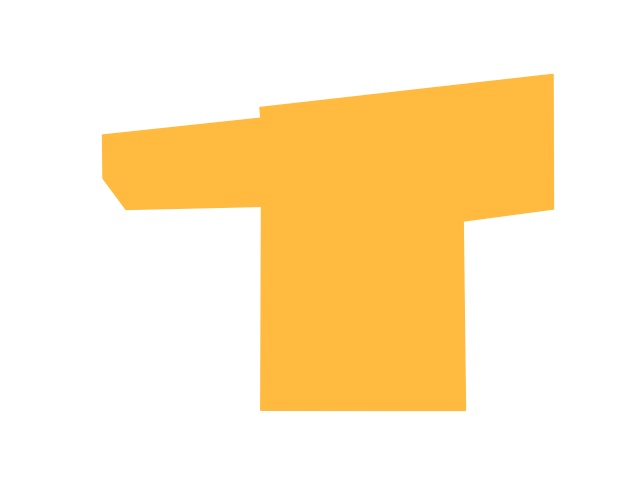

/content/images/0209.jpg


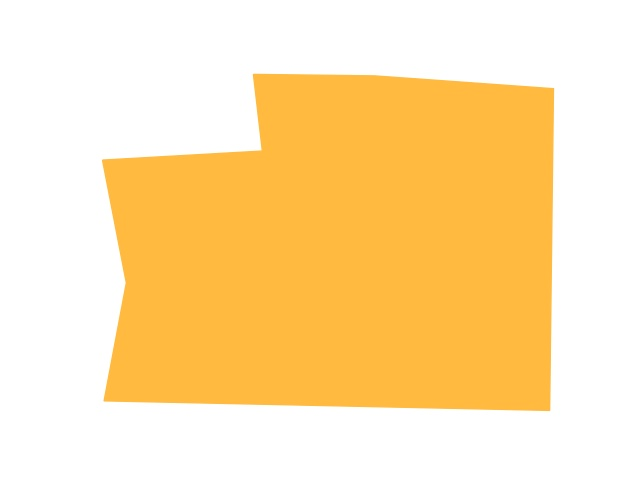

/content/images/0763.jpg


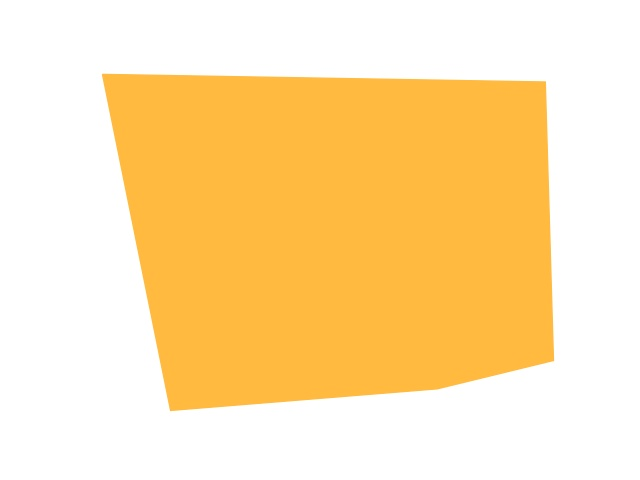

/content/images/0053.jpg


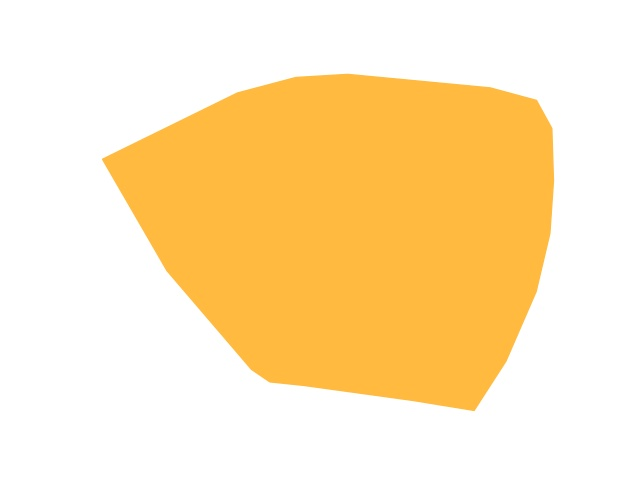

/content/images/0036.jpg


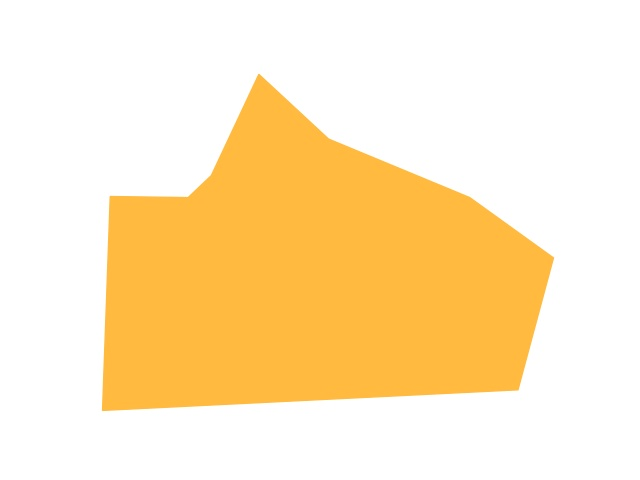

In [ ]:

print(recommended_images)
for image_index in recommended_images:
    # Load and display the image corresponding to the predicted index
    # image_index = image_index[i]
    print(image_index)
    image_path = image_index
    image = cv2.imread(image_path)
    cv2_imshow(image)

In [ ]:
image = cv2.imread('/content/images/0050.jpg')
# 429 50
# ['/content/images/0129.jpg', '/content/images/0126.jpg', '/content/images/0005.jpg', '/content/images/0396.jpg', '/content/images/0131.jpg']

input_edges = 738
input_area = 100000
input_perimeter = 2000
input_length = 464
input_width = 324
input_cluster = 0

# Calculate the tight-fitting bounding box and its length, width, and coordinates
length, width, min_box = calculate_tight_fitting_box(image)
features = (extract_contour_features(image))

print('Number of Edges: ', features[0][0])
print('Area: ', features[0][1])
print('Perimeter: ', features[0][2])
print('Length: ', length)
print('Width: ', width)
cluster = pipeline.predict([[input_edges, input_area, input_perimeter]])
print('Cluster: ', cluster)
print(features, length, width)

print(cluster)

Number of Edges:  70
Area:  148460.0
Perimeter:  1566.0832602977753
Length:  453.0
Width:  338.0
Cluster:  [0]
[[70, 148460.0, 1566.0832602977753]] 453.0 338.0
[0]
